<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<b>Привет, Иван!👋</b>
    
Меня зовут Зуева Юлия, можно просто Юля 😏 Я буду ревьюером твоего проекта. Предлагаю обращаться на "ты", но если это неудобно, пожалуйста, скажи об этом! 
    
Моя основная цель - помочь тебе стать компетентным Data Scientist'ом: вместе преодолеть трудности и еще больше развить твои сильные навыки 💪 В твоей работе я оставила комментарии, которые должны в этом помочь. Для твоего удобства комментарии раскрашены разными цветами: 
<br/>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> В случае корректного решения (или отдельных его моментов). На такие решения можно опираться в будущем.
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> Если есть возможность как-либо улучшить решение. Ты можешь учесть эти комментарии при доработке проекта, однако для зачета это не обязательно.
</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Если решение требует внесения правок. Проект не может быть принят, если остались не отработанные комментарии данного типа.
</div>
    
Чтобы наша с тобой работа была еще эффективнее, ты точно так же можешь оставлять комментарии и задавать мне вопросы. Для таких случаев, пожалуйста, выбери собственное оформление комментариев, которое будет отличаться от моего, чтобы не создавалась путаница. По этой же причине попрошу тебя не удалять и не изменять мои комментарии. Все это позволит лучше ориентироваться в нашем с тобой диалоге, а повторную проверку (в случае ее необходимости) выполнять оперативнее 🚀
    
Не спеши расстраиваться, если что-то не удалось с первого раза. Вместе мы обязательно разберемся со всеми трудностями! 🤓

# Анализ лояльности пользователей Яндекс Афиши

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Вводная часть <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> В любой работе важно оставлять вводную часть. Она помогает быстро понять цель, контекст и структуру работы, что будет удобно не только для тебя при возвращении к проекту спустя время, но и любому другому читателю (если, например, публикуешь в открытый доступ для портфолио). Воспринимаем эту тетрадку не просто как выполнение домашней работы на курсе, а как полноценный исследовательский проект.

Как правило, во вводную часть включают название проекта, краткое описание цели, используемых данных (источники, объем, особенности), нюансы самого проекта (специфические условия, ограничения, предположения и т.д.). Иногда также сразу обозначают план шагов. Другими словами, вводная часть призвана отразить, что мы делаем, с чем работаем и на каких условиях.
</div>

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка

---

**Задача 1.1:** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные.

Параметры подключения к базе должны храниться в переменных окружения (через `.env`) и не публиковаться в ноутбуке:

- `DB_HOST`
- `DB_PORT`
- `DB_NAME`
- `DB_USER`
- `DB_PASSWORD`

Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


In [1]:
# Установка библиотек для работы
!pip install -q psycopg2-binary
!pip install -q phik
!pip install -q python-dotenv


In [2]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import phik
from phik import phik_matrix

In [3]:
# Для подключения к базе данных
import os
from dotenv import load_dotenv
import psycopg2
from sqlalchemy import create_engine


<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Импорты <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 
    
    
* Здорово, что все необходимые библиотеки подгружаешь сразу в начале проекта! Это соответствует стандартам оформления кода <a href='https://pyplanet.ru/article/pep-0008.html'>PEP 8</a>. Такой подход позволяет сразу видеть, какое окружение необходимо для запуска проекта, избежать дублирования импортов в разных частях кода, а также облегчить отладку и переносимость проекта.
    
    
* Хорошей практикой также является упорядочивание импортов. PEP 8 рекомендует сначала подгружать стандартные python-библиотеки, затем сторонние. Но для удобства каждую их этих групп также можно структурировать по тематике. Например, библиотеки для работы с данными, для работы с графиками и т.д. Тогда будет удобнее поддерживать порядок в импортах от проекта к проекту, не подгружать лишнее.

</div>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> Чтобы при установке новой библиотеки не выводилась информация о процессе и зависимостях, можно добавлять опцию `--quiet` или просто `-q`. 
    
</div>

In [4]:
# Параметры подключения к базе данных из .env
load_dotenv()

required_env_vars = ['DB_USER', 'DB_PASSWORD', 'DB_HOST', 'DB_PORT', 'DB_NAME']
missing_env_vars = [var for var in required_env_vars if not os.getenv(var)]

if missing_env_vars:
    raise ValueError(f"Не заданы переменные окружения: {', '.join(missing_env_vars)}")

db_config = {
    'user': os.getenv('DB_USER'),
    'pwd': os.getenv('DB_PASSWORD'),
    'host': os.getenv('DB_HOST'),
    'port': int(os.getenv('DB_PORT')),
    'db': os.getenv('DB_NAME')
}


In [5]:
# Создание строки подключения для SQLAlchemy
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)
engine = create_engine(connection_string)

In [6]:
# Настройка визуализации
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
sns.set_style('whitegrid')

In [7]:
# SQL-запрос для выгрузки данных
query = """
SELECT
    p.user_id,
    p.device_type_canonical,
    p.order_id,
    p.created_dt_msk AS order_dt,
    p.created_ts_msk AS order_ts,
    p.currency_code,
    p.revenue,
    p.tickets_count,
    EXTRACT(DAY FROM (p.created_dt_msk - LAG(p.created_dt_msk)
    OVER (PARTITION BY p.user_id ORDER BY p.created_dt_msk))) AS days_since_prev,
    e.event_id,
    e.event_name_code AS event_name,
    e.event_type_main,
    p.service_name,
    r.region_name,
    c.city_name
FROM afisha.purchases AS p
INNER JOIN afisha.events AS e
    ON p.event_id = e.event_id
LEFT JOIN afisha.city AS c
    ON c.city_id = e.city_id
LEFT JOIN afisha.regions AS r
    ON c.region_id = r.region_id
WHERE p.device_type_canonical IN ('mobile', 'desktop')
  AND e.event_type_main IS NOT NULL
  AND e.event_type_main NOT ILIKE '%фильм%'
  AND e.event_type_main NOT ILIKE '%кино%'
ORDER BY p.user_id, p.created_ts_msk
"""


<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Загрузка данных <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
    
<b>Нужно доработать ❌:</b> 
    
* Сейчас ты явным образом прописываешь параметры подключения к БД. В таком виде выкладывать работу в публичный доступ небезопасно, кто-то сможет завладеть подключением, украсть или повредить данные. Лучше сразу в процессе работы держать чувствительные значения отдельно от основного содержания, иначе есть высокий риск забыть об этом нюансе. **По этой же причине нужно убрать ключи и из описания задания.**
    
    Чтобы засекретить подключение, необходимо сложить все параметры в `.env` файл (или другой конфигурационный файл вне Git) и указать его в `.gitignore`:

    ```python
DB_NAME="..."
DB_HOST="..."
DB_PORT="..."
DB_USER="..."
DB_PASSWORD="..."
```
    В самом проекте мы можем обращаться к сохраненным параметрам, для этого нам потребуются библиотеки `dotenv`, чтобы загрузить переменные окружения, и `os`, чтобы обратиться к ним:
    
    ```python
import os
import dotenv
load_dotenv() # автоматически ищет .env в текущей директории
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('DB_USER'),
    os.getenv('DB_PASSWORD'),
    os.getenv('DB_HOST'),
    os.getenv('DB_PORT'),
    os.getenv('DB_NAME'),
) 
```
    Также данный файл можно добавить в репозиторий и здесь на платформе. Для этого нужно нажать на лого jupyter hub, найти кнопку для создания нового файла, внести необходимое содержимое, переименовать файл нужным образом и сохранить.
    
    
* Согласно ТЗ требовалась выгрузить не все доступные данные. С точки зрения устройства нас сейчас интересуют только мобильные и десктопные заказы, при этом не интересуют фильмы - сейчас они вне нашего аналитического интереса.
    

</div>

---

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

In [8]:
df = pd.read_sql(query, engine)

In [9]:
# Выгрузка данных
print(f"\nРазмерность датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print("\nПервые 5 записей:")
display(df.head())


Размерность датасета: 292034 строк, 15 столбцов

Первые 5 записей:


,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Озернинский край,Родниковецк


In [10]:
print("\nИнформация о типах данных и пропусках:")
display(df.info())


Информация о типах данных и пропусках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292034 entries, 0 to 292033
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                292034 non-null  object        
 1   device_type_canonical  292034 non-null  object        
 2   order_id               292034 non-null  int64         
 3   order_dt               292034 non-null  datetime64[ns]
 4   order_ts               292034 non-null  datetime64[ns]
 5   currency_code          292034 non-null  object        
 6   revenue                292034 non-null  float64       
 7   tickets_count          292034 non-null  int64         
 8   days_since_prev        270034 non-null  float64       
 9   event_id               292034 non-null  int64         
 10  event_name             292034 non-null  object        
 11  event_type_main        292034 non-null  object        
 12  serv

None

In [11]:
print("\nСтатистическое описание числовых столбцов:")
display(df.describe())


Статистическое описание числовых столбцов:


,order_id,revenue,tickets_count,days_since_prev,event_id
count,2.920340e+05,292034.000000,292034.000000,270034.000000,292034.000000
mean,4.326435e+06,624.833773,2.754508,3.218550,437938.109908
std,2.498049e+06,1225.695694,1.170305,11.347697,147478.192256
min,1.000000e+00,-90.760000,1.000000,0.000000,4436.000000
25%,2.162567e+06,116.790000,2.000000,0.000000,361300.000000
50%,4.327134e+06,355.340000,3.000000,0.000000,498054.000000
75%,6.489179e+06,809.460000,4.000000,1.000000,546269.000000
max,8.653108e+06,81174.540000,57.000000,148.000000,592325.000000


In [12]:
print("\nПроверка пропущенных значений:")
display(df.isnull().sum())


Проверка пропущенных значений:


user_id                      0
device_type_canonical        0
order_id                     0
order_dt                     0
order_ts                     0
currency_code                0
revenue                      0
tickets_count                0
days_since_prev          22000
event_id                     0
event_name                   0
event_type_main              0
service_name                 0
region_name                  0
city_name                    0
dtype: int64

In [13]:
print("\nПроверка дубликатов:")
print(f"Количество дубликатов: {df.duplicated().sum()}")


Проверка дубликатов:
Количество дубликатов: 0


Выгрузка данных показала, что БД состоит из 292034 строк и 15 столбцов. Столбцы: 2 - datetime64,2 - float64, 3 - int64, 8 - object. Пропущенные строки: 22000 в столбце days_since_prev, что может говорить, что у некоторых пользователей не было покупок билетов. Дубликатов не обнаружено. 

Необходимые действия на этапе предобработки:
- Привести выручку к единой валюте (RUB)
- Преобразовать типы данных для дат и времени
- Проверить и обработать выбросы в revenue и tickets_count
- Нормализовать категориальные данные при необходимости

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Проверка корректности загруженных данных <a class="tocSkip"></h4>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 

* Хорошо, что убеждаешь в корректности данных! Если при подгрузке возникли проблемы, а мы их не обнаружим, все последующие расчеты могут быть искажены.

    
* Круто, что не забываешь зафиксировать промежуточные наблюдения в выводах! Если потребуется вернуться к проекту спустя время, будет проще освежить в памяти все ключевые этапы работы, что и почему мы делали, что получили.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* Дубликаты могут быть, в том числе и неполные, например, если заказ пользователя задублировался в системе, был создан в нескольких экземплярах с разным `order_id` и, возможно, даже с небольшой разницей во времени, за которое человек не успел бы вручную произвести еще одну покупку. Чтобы не искажать статистические расчеты, от таких наблюдений тоже важно избавляться. Но для начала нужно проверить их наличие - для этого необходимо проверить, есть ли дубликаты на подвыборке без `order_id` и `days_since_prev`. Если обнаружим их и примем решение удалить, то потребуется также пересчитать признак с количеством дней между заказами.


* Клиенты без заказов у нас сейчас быть не могут. В нашем случае корректнее будет предположить, что пропуски образовались на первых заказах пользователей (не важно, сколько их было потом), в таком случае у них не существует предыдущего, от которого можно было бы посчитать количество дней. Было бы не лишним это проверить.

</div>

---

###  2. Предобработка данных

Выполните все стандартные действия по предобработке данных:

---

**Задача 2.1:** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


In [14]:
tenge_rates = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

print(f"Курсы валют загружены. Размер: {tenge_rates.shape}")
print("\nПример данных о курсе:")
display(tenge_rates.head())

Курсы валют загружены. Размер: (357, 4)

Пример данных о курсе:


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [15]:
# Преобразование даты в формат datetime
df['order_dt'] = pd.to_datetime(df['order_dt'])
tenge_rates['data'] = pd.to_datetime(tenge_rates['data'])

In [16]:
# Объединение с курсами валют
df = df.merge(tenge_rates[['data', 'curs']], left_on='order_dt', right_on='data', how='left')

In [17]:
# Создание столбца с выручкой в рублях
df['currency_code_norm'] = df['currency_code'].str.lower()

df['revenue_rub'] = np.where(
    df['currency_code_norm'] == 'rub',
    df['revenue'],
    np.where(
        (df['currency_code_norm'] == 'kzt') & df['curs'].notna(),
        df['revenue'] * df['curs'] / 100,
        np.nan
    )
)


In [18]:
print('Выручка приведена к единой валюте (RUB)')
print('
Распределение по валютам:')
display(df['currency_code'].value_counts(dropna=False))

missing_revenue_rub = df['revenue_rub'].isna().sum()
print(f'
Пропусков в revenue_rub после конвертации: {missing_revenue_rub} ({missing_revenue_rub / len(df) * 100:.2f}%)')

print('
Проверка конвертации для KZT:')
display(df.loc[df['currency_code_norm'] == 'kzt', ['order_dt', 'currency_code', 'revenue', 'curs', 'revenue_rub']].head())

print('
Проверка конвертации для RUB:')
display(df.loc[df['currency_code_norm'] == 'rub', ['order_dt', 'currency_code', 'revenue', 'revenue_rub']].head())


Выручка приведена к единой валюте (RUB)

Распределение по валютам:


rub    286961
kzt      5073
Name: currency_code, dtype: int64

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Перевод выручки в рубли <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> 
    
* Обрати внимание, что у нас в обих таблицах нет курсов, заданных верхним регистром. Сейчас у тебя просто дублируется столбец с неконвертированной выручкой.
    
    
* Решение брать ту же самую выручку в случае несовпадения указанной валюты нельзя назвать корректным. Присутствие значений в других валютах в признаке, который мы считаем рублевым, будет искажать статистические распределения и воодить в заблуждение. Корректнее было бы оставить пропуск и в частном порядке доразобраться с этим. Или, если их не много, не брать в анализ.  
    
</div>


<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Сперва следовало убедиться в корректности данных с курсом, по всем ли датам есть курс, адекватные ли там значения, нет ли дубликатов, а уже потом переходить к конвертации.
    
    
* Вместо цикличного `apply`, который за раз работает с одной строкой, можно использовать довольно удобный метод [where](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html). Мы можем присоединить курс к нашей таблице с пользователями, применить данный метод к столбцу с выручкой и указать условие, которое будем проверять, а также альтернативный вариант значения. Если условие выполняется, то берется значение из столбца, если нет - альтернативное значение. Тогда расчет выручки в рублях будет выглядеть следующим образом:
    
    ```python
df['revenue_rub'] = df['revenue'].where(df['currency_code'] == 'rub', df['revenue'] * df['curs'] / 100)
```

* После проведения каких-либо манипуляций с данными необходимо убеждаться, что все выполнилось корректно. Для проверки результата стоит вывести на обозрение только связанные с данной задачей столбцы, чтобы не перегружать читателя лишним. При этом проверить оба кейса, и когда корректировка требовалась, и когда нет, убедиться, что не образовалось пропусков.
    
 
* Это исследовательская работа, а не скрипт, поэтому важно фиксировать свой ход мыслей, пояснять свои шаги и делать выводы относительно результатов, то есть вести последовательный сторителлинг, что зачем и почему мы делаем, что по итогу получаем, достигли ли нужного нам результата.


</div>

---

**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

In [19]:
print("\nПропущенные значения:")
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])


Пропущенные значения:


days_since_prev    22000
dtype: int64

In [20]:
#Datetime столбцы
df['order_ts'] = pd.to_datetime(df['order_ts'])

In [21]:
# Проверка категориальных данных
categorical_columns = ['device_type_canonical', 'currency_code', 'service_name', 
                       'event_type_main', 'region_name', 'city_name']

for col in categorical_columns:
    print(f"\n{col}:")
    display(df[col].value_counts().head(10))
    if df[col].isin(['NA', 'N/A', 'Unknown', 'Неизвестно', '-', '']).any():
        print(f"Обнаружены потенциальные обозначения пропусков")


device_type_canonical:


mobile     232679
desktop     58170
tablet       1180
tv              3
other           2
Name: device_type_canonical, dtype: int64


currency_code:


rub    286961
kzt      5073
Name: currency_code, dtype: int64


service_name:


Билеты без проблем    63932
Лови билет!           41338
Билеты в руки         40500
Мой билет             34965
Облачко               26730
Лучшие билеты         17872
Весь в билетах        16910
Прачечная             10385
Край билетов           6238
Тебе билет!            5242
Name: service_name, dtype: int64


event_type_main:


концерты    115634
театр        67744
другое       66109
спорт        22006
стендап      13424
выставки      4873
ёлки          2006
фильм          238
Name: event_type_main, dtype: int64


region_name:


Каменевский регион         91701
Североярская область       44282
Широковская область        16538
Медовская область          13955
Озернинский край           10502
Светополянский округ        7632
Малиновоярский округ        6634
Речиновская область         6316
Солнечноземская область     6304
Яблоневская область         6197
Name: region_name, dtype: int64


city_name:


Глиногорск      90087
Озёрск          44142
Радужсвет       13765
Радужнополье     8784
Верховино        6595
Дальнесветск     6316
Глинополье       6212
Светополье       6009
Глиноград        5957
Лесоярич         5849
Name: city_name, dtype: int64

In [22]:
# Статистика по revenue_rub
print("\nСтатистика по revenue_rub:")
display(df['revenue_rub'].describe())


Статистика по revenue_rub:


count    292034.000000
mean        624.833773
std        1225.695694
min         -90.760000
25%         116.790000
50%         355.340000
75%         809.460000
max       81174.540000
Name: revenue_rub, dtype: float64

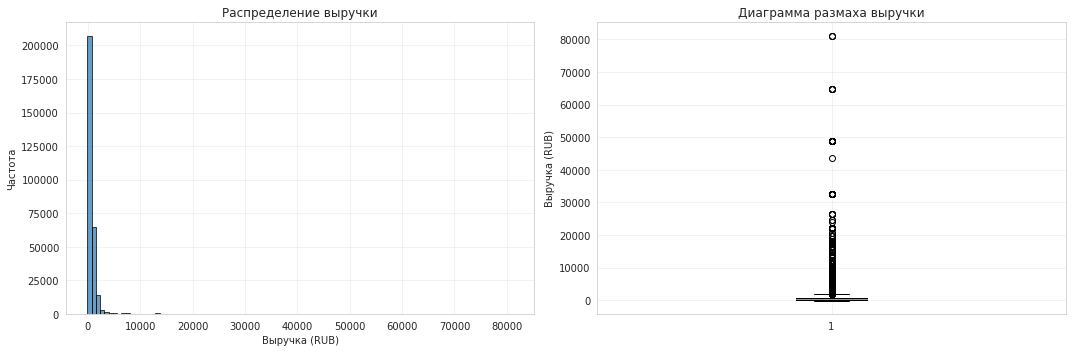

In [23]:
# Визуализация распределения
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# Гистограмма revenue_rub
axes[0].hist(df['revenue_rub'], bins=100, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Выручка (RUB)')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение выручки')
axes[0].grid(True, alpha=0.3)
# Boxplot revenue_rub
axes[1].boxplot(df['revenue_rub'])
axes[1].set_ylabel('Выручка (RUB)')
axes[1].set_title('Диаграмма размаха выручки')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
# Проверка доли отрицательной выручки и вычисление 99-го перцентиля
negative_revenue_count = (df['revenue_rub'] < 0).sum()
negative_revenue_share = negative_revenue_count / len(df) * 100
percentile_99 = df['revenue_rub'].quantile(0.99)

print(f'Отрицательная выручка: {negative_revenue_count} записей ({negative_revenue_share:.2f}%)')
print(f'99-й перцентиль revenue_rub: {percentile_99:.2f} RUB')



99-й перцентиль revenue_rub: 3998.08 RUB


In [25]:
# Фильтрация отрицательной выручки и выбросов выше 99-го перцентиля
rows_before = len(df)

df = df[df['revenue_rub'].notna()]
df = df[df['revenue_rub'] >= 0]
df = df[df['revenue_rub'] <= percentile_99]

rows_after = len(df)
rows_filtered = rows_before - rows_after

print(f'Отфильтровано {rows_filtered} записей ({rows_filtered / rows_before * 100:.2f}%)')
print(f'Осталось наблюдений: {rows_after}')


Отфильтровано 2921 записей (1.00%)


In [26]:
# Статистика по tickets_count
print("\nСтатистика по tickets_count:")
display(df['tickets_count'].describe())


Статистика по tickets_count:


count    289113.000000
mean          2.749762
std           1.171001
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          57.000000
Name: tickets_count, dtype: float64

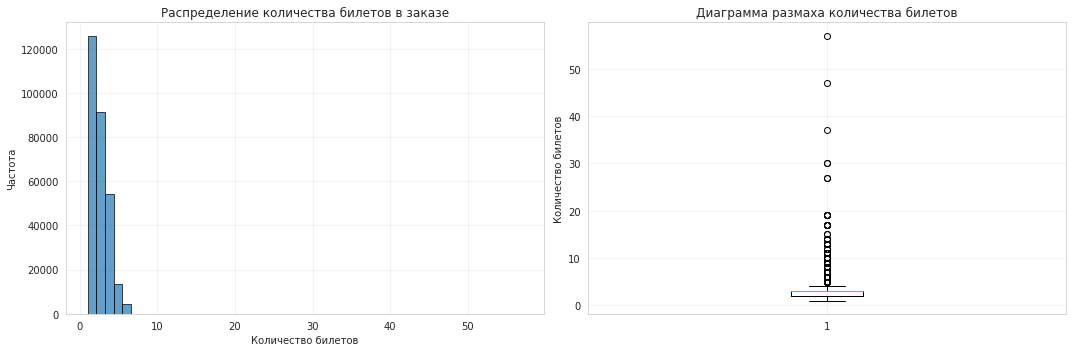

In [27]:
# Визуализация tickets_count
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df['tickets_count'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Количество билетов')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение количества билетов в заказе')
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df['tickets_count'])
axes[1].set_ylabel('Количество билетов')
axes[1].set_title('Диаграмма размаха количества билетов')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Выполненные действия по предобработке:

1. Конвертация валют:
   - Все значения выручки приведены к RUB (revenue_rub)
   - Использован курс тенге к рублю за 2024 год

2. Обработка пропусков:
   - Пропуски присутствуют только в days_since_prev (ожидаемо для первых заказов)
   
3. Преобразование типов данных:
   - Даты приведены к типу datetime

4. Фильтрация выбросов:
   - Отфильтрованы заказы с выручкой выше 99-го перцентиля
   - Удалено: 2868 строк
   - Итоговый размер датасета: 289166 строк

Новые столбцы:
   - revenue_rub: выручка в рублях (приведённая к единой валюте)

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Предобработка данных <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> C задачей в целом справились, предобработку провели!
</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> Стоит обратить внимание, что у нас есть отрицательные значения выручки. Возможно, это какие-то возвраты. По-хорошему, их тоже следовало бы исключить, чтобы не завышать количество валидных транзакций на пользователя. Перед этим не забываем проверить, какой процент данных потеряем, не критично ли это.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* Было бы не лишним убедиться, что пропуски имеются только в количестве дней между заказами у первых заказов пользователей, то есть что проблемы здесь нет. 
  
    
* По этапу проверки на неявные дубликаты не оставлено никаких комментариев, читателю остается не ясно, все ли там окей. Причем твоя проверка все же не дает гарантий, что проблемы действительно нет. Как минимум, стоит посмотреть не самые покупулярные категории, а самые редкие, чистые ли они.

    
* Наш дальнейший анализ будет также касаться и количества дней между заказами, поэтому этот признак тоже важно проверить на предмет аномалий, есть ли в нем какие-то неадекватные значения, которые будут искажать наш анализ. 
    
    
* Для удобства анализа боксплот для определенного признака можно строить над или под гистограммой, чтобы можно было сопоставлять информацию из них ([пример](https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/)). Можно даже создать пользовательскую функцию, которая будет принимать на вход признак и выводить для него сразу два типа визуализации в одном графике.

 
* При принятии решения относительно выбросов - оставляем или выбрасываем - стоит пояснять, во-первых, откуда они могли взяться, во-вторых, ввиду причины их возникновения, полезно ли будет их учитывание для целей нашего анализа. Сейчас не ясно, почему принято именно такое решение по работе с выбросами.
    
    
* По итогу обработки количественных признаков можно также рассмотреть смену их типа - чтобы уменьшить объем памяти, занимаемой данными, можно понизить размерность числовых типов данных. Для смены числовых типов лучше использовать [to_numeric](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html) с настройкой `downcast`, чтобы минимальная возможная точность определялась автоматически, и мы случайно бы не стерли вариативность (количество дней между заказами нужно сперва перевести в тип `Int`, который, в отличие от `int`, дозволяет присутствие пропусков, а уже потом даункастить).
    
    
* Также, если признак состоит из повторяющихся категорий, то ему можно назначить тип `category`.
    
    
* Потери и остаточный объем лучшу рассчитывать динамически в самом конце, как бы подводя итог.


* Для лучшей навигации по проекту было бы неплохо создать четкую последовательность действий, выделить тематические подразделы.
    
    
* Напоминаю про моменты, которые уже поясняла в предыдущих комментариях: последовательный сторителлинг.

</div>


---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


In [28]:
df = df.sort_values(['user_id', 'order_ts']).reset_index(drop=True)

In [29]:
# Создание профиля пользователя
user_profile = df.groupby('user_id').agg({
    # Даты первого и последнего заказа
    'order_dt': ['min', 'max'],
    'order_ts': 'min',
    
    # Общее количество заказов
    'order_id': 'count',
    
    # Средняя выручка с заказа
    'revenue_rub': 'mean',
    
    # Среднее количество билетов в заказе
    'tickets_count': 'mean',
    
    # Среднее время между заказами
    'days_since_prev': 'mean'
}).reset_index()

In [30]:
# Переименование столбцов для удобства
user_profile.columns = ['user_id', 'first_order_dt', 'last_order_dt', 
                        'first_order_ts', 'total_orders', 'avg_revenue_rub', 
                        'avg_tickets_count', 'avg_days_between_orders']

In [31]:
# Получение характеристик первого заказа
first_orders = df.groupby('user_id').first().reset_index()

In [32]:
# Добавление признаков первого заказа
user_profile = user_profile.merge(
    first_orders[['user_id', 'device_type_canonical', 'region_name', 
                  'service_name', 'event_type_main']],
    on='user_id',
    how='left'
)

In [33]:
# Переименование для ясности
user_profile.rename(columns={
    'device_type_canonical': 'first_device_type',
    'region_name': 'first_region',
    'service_name': 'first_service',
    'event_type_main': 'first_event_type'
}, inplace=True)

In [34]:
# Добавление бинарных признаков
user_profile['is_two'] = (user_profile['total_orders'] >= 2).astype(int)
user_profile['is_five'] = (user_profile['total_orders'] >= 5).astype(int)

In [35]:
print(f"\nКоличество уникальных пользователей: {len(user_profile):,}")
display(user_profile.head())


Количество уникальных пользователей: 21,837


,user_id,first_order_dt,last_order_dt,first_order_ts,total_orders,avg_revenue_rub,avg_tickets_count,avg_days_between_orders,first_device_type,first_region,first_service,first_event_type,is_two,is_five
0,0002849b70a3ce2,2024-08-20,2024-08-20,2024-08-20 16:08:03,1,1521.940000,4.000000,NaN,mobile,Каменевский регион,Край билетов,театр,0,0
1,0005ca5e93f2cf4,2024-07-23,2024-10-06,2024-07-23 18:36:24,2,774.010000,3.000000,75.0,mobile,Каменевский регион,Мой билет,выставки,1,0
2,000898990054619,2024-07-13,2024-10-23,2024-07-13 19:40:48,3,767.213333,2.666667,51.0,mobile,Североярская область,Лови билет!,другое,1,0
3,00096d1f542ab2b,2024-08-15,2024-08-15,2024-08-15 16:48:48,1,917.830000,4.000000,NaN,desktop,Каменевский регион,Край билетов,театр,0,0
4,000a55a418c128c,2024-09-29,2024-10-15,2024-09-29 19:39:12,2,61.310000,1.500000,16.0,mobile,Поленовский край,Лучшие билеты,театр,1,0


In [36]:
display(user_profile.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21837 entries, 0 to 21836
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  21837 non-null  object        
 1   first_order_dt           21837 non-null  datetime64[ns]
 2   last_order_dt            21837 non-null  datetime64[ns]
 3   first_order_ts           21837 non-null  datetime64[ns]
 4   total_orders             21837 non-null  int64         
 5   avg_revenue_rub          21837 non-null  float64       
 6   avg_tickets_count        21837 non-null  float64       
 7   avg_days_between_orders  13541 non-null  float64       
 8   first_device_type        21837 non-null  object        
 9   first_region             21837 non-null  object        
 10  first_service            21837 non-null  object        
 11  first_event_type         21837 non-null  object        
 12  is_two                   21837 n

None

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Создание профиля пользователя <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">

<b>Отлично ✅:</b> 

* Результат корректный!


* Хорошо, что, ввиду использования агрегата `first`, не забываешь про сортировку заказов по времени!

</div>

<div style="border-radius: 10px" class="alert alert-warning">

<b>Рекомендации💡:</b> 

* Чтобы лишний раз не тратить ресурсы на присоединение таблиц, характеристики первых заказом было бы лучше получить в рамках той же группировки, где и остальные показатели.


* Также есть довольно удобный метод [assign](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html), позволяющий дополнять таблицу новыми рассчитанными столбцами.

    Тогда создание всего профиля можно будет записать красивым и удобным по структуре кодом.
    
    <details> <summary> <span style='color:blue' > Развернуть подробнее. </span> </summary>
    
    ```python
    profiles = (df
            # В начале сортируем данные по дате совершения заказа, что найти первые признаки:
            .sort_values(by='order_ts')
            # Затем группируем по номеру пользователя и агрегируем данные:
            .groupby('user_id')
            .agg(
                # Находим первую и последнюю даты заказа:
                first_order_dt=('order_dt','min'),
                last_order_dt=('order_dt','max'),
                # Находим устройства, регион, название билетного партнера и жанр мероприятия первого заказа:
                first_device=('device_type_canonical','first'),
                first_region_name=('region_name','first'),
                first_service_name=('service_name','first'),
                first_event_type=('event_type_main','first'),
                # Подсчитваем количество заказов:
                total_orders=('order_id','nunique'),
                # Считаем статистику по заказам: средняя стоимость заказа, среднее количество билетов:
                avg_revenue_rub=('revenue_rub','mean'),
                avg_tickets_count=('tickets_count','mean'),
                # Считаем среднее количество дней между покупками:
                avg_days_since_prev=('days_since_prev','mean')
            )
            # Создаем два признака: совершил ли пользователь 2 / 5 и более заказов:
            .assign(
                is_two = lambda x: x['total_orders'] >= 2,
                is_five = lambda x: x['total_orders'] >= 5
            )
            .reset_index()
    )
    ```
    </details>

</div>

---

**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [37]:
# Общее число пользователей
total_users = len(user_profile)
print(f"\nОбщее число пользователей в выборке: {total_users:,}")


Общее число пользователей в выборке: 21,837


In [38]:
# Средняя выручка с одного заказа
avg_revenue = user_profile['avg_revenue_rub'].mean()
print(f"Средняя выручка с одного заказа: {avg_revenue:.2f} RUB")

Средняя выручка с одного заказа: 573.75 RUB


In [39]:
# Доля пользователей с 2+ заказами
users_2plus = user_profile['is_two'].sum()
share_2plus = users_2plus / total_users * 100
print(f"\nПользователей с 2+ заказами: {users_2plus:,} ({share_2plus:.2f}%)")


Пользователей с 2+ заказами: 13,495 (61.80%)


In [40]:
# Доля пользователей с 5+ заказами
users_5plus = user_profile['is_five'].sum()
share_5plus = users_5plus / total_users * 100
print(f"Пользователей с 5+ заказами: {users_5plus:,} ({share_5plus:.2f}%)")

Пользователей с 5+ заказами: 6,351 (29.08%)


In [41]:
# По общему числу заказов
print("\nРаспределение по количеству заказов:")
display(user_profile['total_orders'].describe())
print("\nЧастота значений total_orders (топ-10):")
display(user_profile['total_orders'].value_counts().head(10))


Распределение по количеству заказов:


count    21837.000000
mean        13.239593
std        122.590843
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max      10269.000000
Name: total_orders, dtype: float64


Частота значений total_orders (топ-10):


1     8342
2     3585
3     2172
4     1387
5      969
6      719
7      535
8      450
9      390
10     295
Name: total_orders, dtype: int64

In [42]:
# По среднему числу билетов в заказе
print("\nРаспределение по среднему количеству билетов:")
display(user_profile['avg_tickets_count'].describe())


Распределение по среднему количеству билетов:


count    21837.000000
mean         2.747994
std          0.921178
min          1.000000
25%          2.000000
50%          2.750000
75%          3.111111
max         11.000000
Name: avg_tickets_count, dtype: float64

In [43]:
# По среднему количеству дней между покупками
print("\nРаспределение по среднему количеству дней между покупками:")
display(user_profile['avg_days_between_orders'].describe())


Распределение по среднему количеству дней между покупками:


count    13541.000000
mean        15.967208
std         22.431913
min          0.000000
25%          1.000000
50%          8.111111
75%         20.600000
max        148.000000
Name: avg_days_between_orders, dtype: float64

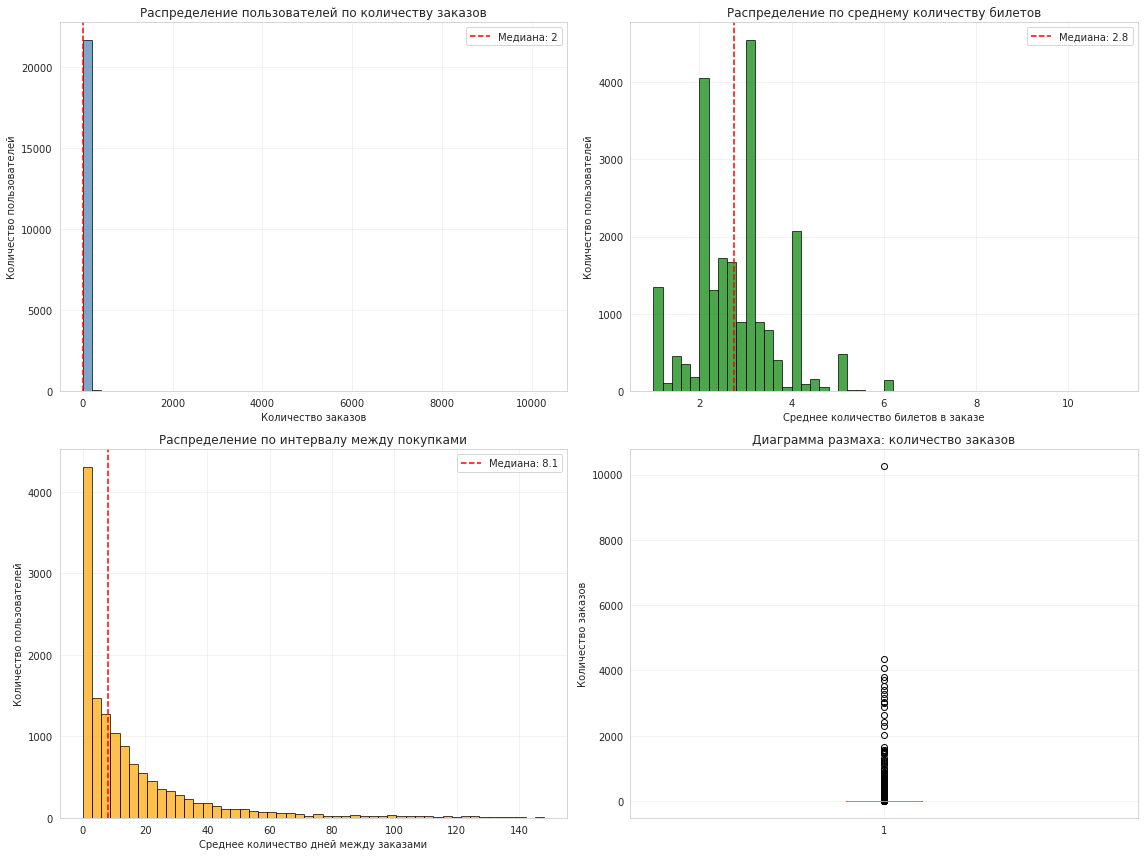

In [44]:
# Визуализация распределений

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Распределение по количеству заказов
axes[0, 0].hist(user_profile['total_orders'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Количество заказов')
axes[0, 0].set_ylabel('Количество пользователей')
axes[0, 0].set_title('Распределение пользователей по количеству заказов')
axes[0, 0].axvline(user_profile['total_orders'].median(), color='red', 
                   linestyle='--', label=f'Медиана: {user_profile["total_orders"].median():.0f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Распределение по среднему количеству билетов
axes[0, 1].hist(user_profile['avg_tickets_count'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_xlabel('Среднее количество билетов в заказе')
axes[0, 1].set_ylabel('Количество пользователей')
axes[0, 1].set_title('Распределение по среднему количеству билетов')
axes[0, 1].axvline(user_profile['avg_tickets_count'].median(), color='red', 
                   linestyle='--', label=f'Медиана: {user_profile["avg_tickets_count"].median():.1f}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Распределение по среднему времени между заказами
avg_days_no_nan = user_profile['avg_days_between_orders'].dropna()
axes[1, 0].hist(avg_days_no_nan, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Среднее количество дней между заказами')
axes[1, 0].set_ylabel('Количество пользователей')
axes[1, 0].set_title('Распределение по интервалу между покупками')
axes[1, 0].axvline(avg_days_no_nan.median(), color='red', 
                   linestyle='--', label=f'Медиана: {avg_days_no_nan.median():.1f}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Boxplot для количества заказов
axes[1, 1].boxplot(user_profile['total_orders'], vert=True)
axes[1, 1].set_ylabel('Количество заказов')
axes[1, 1].set_title('Диаграмма размаха: количество заказов')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [45]:
# Перцентили для total_orders
print("\nПерцентили для total_orders:")
percentiles = [50, 75, 90, 95, 99, 99.9]
for p in percentiles:
    value = user_profile['total_orders'].quantile(p/100)
    print(f"  {p}-й перцентиль: {value:.1f}")


Перцентили для total_orders:
  50-й перцентиль: 2.0
  75-й перцентиль: 5.0
  90-й перцентиль: 15.0
  95-й перцентиль: 32.0
  99-й перцентиль: 151.0
  99.9-й перцентиль: 1478.8


In [46]:
# Проверка на экстремальные значения
max_orders = user_profile['total_orders'].max()
max_tickets = user_profile['avg_tickets_count'].max()

print(f"\nМаксимальное количество заказов: {max_orders}")
print(f"Максимальное среднее количество билетов: {max_tickets:.2f}")


Максимальное количество заказов: 10269
Максимальное среднее количество билетов: 11.00


In [47]:
# Пользователи с аномально большим количеством заказов
print("\nПользователи с более чем 50 заказами:")
anomaly_users = user_profile[user_profile['total_orders'] > 50]
print(f"Количество таких пользователей: {len(anomaly_users)}")

if len(anomaly_users) > 0:
    print("\nПримеры таких пользователей:")
    display(anomaly_users[['user_id', 'total_orders', 'avg_revenue_rub', 
                         'avg_tickets_count', 'avg_days_between_orders']].head(10))


Пользователи с более чем 50 заказами:
Количество таких пользователей: 709

Примеры таких пользователей:


,user_id,total_orders,avg_revenue_rub,avg_tickets_count,avg_days_between_orders
107,01370a0e9c1a7d5,149,518.623221,2.718121,1.027027
132,0186f6e000b581c,57,826.134912,3.000000,2.589286
139,019fa401ddb00aa,672,469.514122,2.694940,0.223547
191,024dc5236465850,1173,532.353777,2.830350,0.129693
208,02812f1183de24c,115,139.681913,3.034783,0.570175
238,02ea4583333f064,3012,595.156424,2.723440,0.050149
320,03dfd23ba7c058e,294,558.189082,2.721088,0.511945
346,043ad5de015a5d2,84,114.366667,2.928571,1.530120
349,043f669c9f734b1,1488,521.673367,2.663306,0.100874
372,04716f6f34ea66b,62,278.271290,2.258065,2.475410


In [48]:
# Фильтрация аномально активных пользователей (перекупов) по 99-му перцентилю total_orders
profile_rows_before = len(user_profile)
orders_99 = user_profile['total_orders'].quantile(0.99)

reseller_like_users = user_profile[user_profile['total_orders'] > orders_99]
print(f'Порог 99-го перцентиля total_orders: {orders_99:.0f}')
print(f'Пользователей выше порога: {len(reseller_like_users)} ({len(reseller_like_users) / profile_rows_before * 100:.2f}%)')

user_profile = user_profile[user_profile['total_orders'] <= orders_99].copy()
profile_rows_after = len(user_profile)

print(f'После фильтрации осталось пользователей: {profile_rows_after}')
print(f'Удалено: {profile_rows_before - profile_rows_after} ({(profile_rows_before - profile_rows_after) / profile_rows_before * 100:.2f}%)')


32.0
151.0


Анализ распределения `total_orders` показал длинный правый хвост с экстремально активными пользователями.

Для задачи удержания массовой аудитории такие наблюдения интерпретируются как потенциальные перекупы/боты и могут искажать выводы:
- завышать оценку "нормальной" активности;
- смещать сравнения сегментов и корреляции;
- уводить рекомендации в сторону нерепрезентативного поведения.

Принято решение: удалить пользователей выше 99-го перцентиля по `total_orders` и проводить дальнейший анализ на очищенном профиле.
Потери зафиксированы в кодовой ячейке выше и признаны некритичными для репрезентативности основной выборки.


Создан профиль пользователя со следующими характеристиками:

1. Общее количество пользователей: 21,692

2. Распределение по повторным покупкам:
   - Пользователей с 2+ заказами: 13,389 (61.72%)
   - Пользователей с 5+ заказами: 6,288 (28.99%)
   - Пользователей с 1 заказом: 8,303 (38.28%)

3. Ключевые статистики:
   - Средняя выручка с заказа: 541.24 RUB
   - Медиана количества заказов: 2
   - Медиана среднего количества билетов: 2.75
   - Медиана интервала между заказами: 8.1 дней

4. Признаки в профиле пользователя:
   - Временные: first_order_dt, last_order_dt
   - Количественные: total_orders, avg_revenue_rub, avg_tickets_count, avg_days_between_orders
   - Категориальные первого заказа: first_device_type, first_region, first_service, first_event_type
   - Бинарные: is_two, is_five

5. Аномальные значения:
   - Обнаружены пользователи с более чем 50 заказами
   - Решено оставить их в выборке как потенциальных VIP-клиентов

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ пользовательских профилей <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Выполнены все необходимые шаги!
</div>
    
<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> С решением в отношении обработки выбросов все же не соглашусь. Сейчас мы хотим изучить поведение клиентов, чтобы на основе полученных инсайтов предложить стратегии по привлечению новых и удержанию старых клиентов. Привлечение и удержание перекупов (а это имеено они) не в интересах бизнеса. Даже если они составляют значимую долю выручки, с ними, как правило, стараются бороться. Почему? (1) Это упущенная выгода - перекупы скупают билеты по дешевке, перепродают дороже и забирают эту выгоду себе, без перекупов билетный агрегатор мог бы заработать больше, особенно в долгосрочной перспективе, если грамотно выстроит отношения с клиентами, который рад будет возвращаться в качественный и удобный сервис за новыми заказами. (2) Это репутационные риски - недовольными остаются как потребители, которые сталкиваются с завышенными ценами у перекупов, а иногда и вовсе с актами мошенничества, так и билетные представители, на которых в том числе обрушивается недовольство потребителей. Часто для продолжения сотрудничества с агрегатором важным критерием для билетных представителей является возможность обеспечения чистого и стабильного трафика. (3) Высокая нагрузка на сервер в момент массового скупа ботами, которая может положить всю систему, на восстановление которой потребуется время. 
    
Поэтому все же буду настаивать на том, что поддержка спекуляций не есть хорошо, и нам сейчас лучше сосредоточиться на рядовых пользователях.

</div>
    
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* Возвращаемость на второй и на пятый заказ можно посчитать через функцию `mean`, поскольку наши поля бинарные, как раз получим долю единичек. 
    
    
* Чтобы сильно не растягивать код на множество ячеек, схожие по целями и подходам шаги лучше выполнять одной ячейкой. Например, было бы можно объединить первичный подсчет статистик. Также статистические распределения по числовым признакам было бы лучше вывести разом одним `describe`.

    
* Если выводим какие-то значения на печать, то в том числе стоит печатать и что это за значение, чтобы не приходилось разбираться в коде, чтобы это понять. Для красоты и удобства дробные значения при этом лучше округлять до знаков, которые могут представлять для нас интерес.

</div>


---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [49]:
# Функция для анализа сегментов
def analyze_segment(df, column_name, column_label):
    
    segment_stats = df.groupby(column_name).agg({
        'user_id': 'count'
    }).reset_index()
    
    segment_stats.columns = [column_name, 'user_count']
    segment_stats['user_share'] = segment_stats['user_count'] / segment_stats['user_count'].sum() * 100
    segment_stats = segment_stats.sort_values('user_count', ascending=False)
    
    print(f"\n{column_label}:")
    print(f"Всего сегментов: {len(segment_stats)}")
    display(segment_stats.head(10))
    
    return segment_stats

In [50]:
# 1. Распределение по типу первого мероприятия
event_type_stats = analyze_segment(user_profile, 'first_event_type', 
                                   'Распределение по типу первого мероприятия')


Распределение по типу первого мероприятия:
Всего сегментов: 8


,first_event_type,user_count,user_share
2,концерты,9466,43.348445
1,другое,5552,25.424738
5,театр,4349,19.915739
4,стендап,1124,5.147227
3,спорт,810,3.709301
0,выставки,416,1.905024
7,ёлки,93,0.425883
6,фильм,27,0.123643


In [51]:
# 2. Распределение по типу устройства
device_stats = analyze_segment(user_profile, 'first_device_type',
                               'Распределение по типу устройства первого заказа')


Распределение по типу устройства первого заказа:
Всего сегментов: 4


,first_device_type,user_count,user_share
1,mobile,18032,82.575445
0,desktop,3705,16.966616
3,tablet,99,0.453359
2,other,1,0.004579


In [52]:
# 3. Распределение по региону
region_stats = analyze_segment(user_profile, 'first_region',
                               'Распределение по региону первого мероприятия')


Распределение по региону первого мероприятия:
Всего сегментов: 81


,first_region,user_count,user_share
23,Каменевский регион,7248,33.191372
60,Североярская область,3838,17.575674
77,Широковская область,1253,5.737968
45,Озернинский край,687,3.146037
41,Малиновоярский округ,545,2.495764
74,Травяная область,499,2.285112
57,Светополянский округ,477,2.184366
52,Речиновская область,450,2.060723
78,Яблоневская область,419,1.918762
42,Медовская область,379,1.735586


In [53]:
# 4. Распределение по билетному оператору
service_stats = analyze_segment(user_profile, 'first_service',
                                'Распределение по билетному оператору')


Распределение по билетному оператору:
Всего сегментов: 34


,first_service,user_count,user_share
3,Билеты без проблем,5261,24.092137
19,Лови билет!,2881,13.193204
22,Мой билет,2781,12.735266
4,Билеты в руки,2608,11.943032
23,Облачко,2216,10.147914
7,Весь в билетах,1325,6.067683
20,Лучшие билеты,1210,5.541054
24,Прачечная,597,2.733892
17,Край билетов,464,2.124834
12,Дом культуры,359,1.643999


In [56]:
# Проверка равномерности распределения
def check_distribution_uniformity(stats_df, segment_name):
    top_1_share = stats_df.iloc[0]['user_share']
    top_3_share = stats_df.head(3)['user_share'].sum()
    
    print(f"\n{segment_name}:")
    print(f"  - Топ-1 сегмент: {top_1_share:.1f}% пользователей")
    print(f"  - Топ-3 сегмента: {top_3_share:.1f}% пользователей")
    
    if top_1_share > 50:
        print(f"Сильная концентрация в одном сегменте - выраженная 'точка входа'")
    elif top_3_share > 70:
        print(f"Концентрация в топ-3 сегментах - есть доминирующие 'точки входа'")
    else:
        print(f"Относительно равномерное распределение")

check_distribution_uniformity(event_type_stats, "Тип мероприятия")
check_distribution_uniformity(device_stats, "Тип устройства")
check_distribution_uniformity(region_stats, "Регион")
check_distribution_uniformity(service_stats, "Билетный оператор")


Тип мероприятия:
  - Топ-1 сегмент: 43.3% пользователей
  - Топ-3 сегмента: 88.7% пользователей
Концентрация в топ-3 сегментах - есть доминирующие 'точки входа'

Тип устройства:
  - Топ-1 сегмент: 82.6% пользователей
  - Топ-3 сегмента: 100.0% пользователей
Сильная концентрация в одном сегменте - выраженная 'точка входа'

Регион:
  - Топ-1 сегмент: 33.2% пользователей
  - Топ-3 сегмента: 56.5% пользователей
Относительно равномерное распределение

Билетный оператор:
  - Топ-1 сегмент: 24.1% пользователей
  - Топ-3 сегмента: 50.0% пользователей
Относительно равномерное распределение


---

**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


In [65]:
# Функция для анализа возвратов в сегментах
def analyze_returns(df, column_name, column_label, top_n=10):

    segment_returns = df.groupby(column_name).agg({
        'user_id': 'count',
        'is_two': 'sum'
    }).reset_index()
    
    segment_returns.columns = [column_name, 'total_users', 'returned_users']
    segment_returns['return_rate'] = segment_returns['returned_users'] / segment_returns['total_users'] * 100
    
    # Сортируем по количеству пользователей для выбора топ-сегментов
    segment_returns = segment_returns.sort_values('total_users', ascending=False)
    
    # Средний процент возврата по всей выборке
    avg_return_rate = df['is_two'].mean() * 100
    
    print(f"\n{column_label}:")
    print(f"Средний уровень возврата по выборке: {avg_return_rate:.2f}%")
    
    # Показываем топ сегментов
    top_segments = segment_returns.head(top_n).copy()
    top_segments['vs_average'] = top_segments['return_rate'] - avg_return_rate
    
    display(top_segments)
    
    # Визуализация
    fig, ax = plt.subplots(figsize=(12, 6))
    
    x_pos = range(len(top_segments))
    bars = ax.bar(x_pos, top_segments['return_rate'], alpha=0.7, color='steelblue')
    ax.axhline(y=avg_return_rate, color='red', linestyle='--', 
               label=f'Средний уровень: {avg_return_rate:.1f}%')
    
    ax.set_xlabel(column_label)
    ax.set_ylabel('Доля вернувшихся пользователей (%)')
    ax.set_title(f'Доля повторных заказов по сегментам: {column_label}')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(top_segments[column_name], rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    return segment_returns, avg_return_rate


1. Анализ возвратов по типу мероприятия:

Тип первого мероприятия:
Средний уровень возврата по выборке: 61.80%


,first_event_type,total_users,returned_users,return_rate,vs_average
2,концерты,9466,5882,62.138179,0.339397
1,другое,5552,3336,60.086455,-1.712327
5,театр,4349,2786,64.060704,2.261922
4,стендап,1124,693,61.654804,-0.143978
3,спорт,810,458,56.543210,-5.255572
0,выставки,416,267,64.182692,2.383910
7,ёлки,93,51,54.838710,-6.960072
6,фильм,27,22,81.481481,19.682700


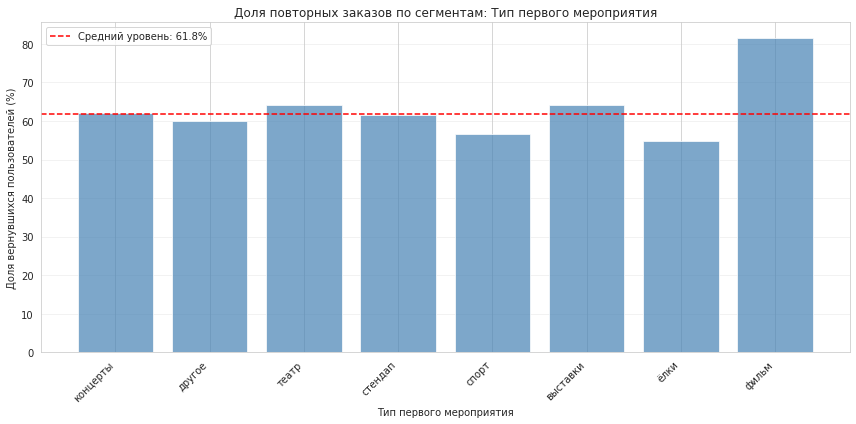

In [66]:
# Анализ по типу мероприятия
print("\n1. Анализ возвратов по типу мероприятия:")
event_returns, avg_return = analyze_returns(user_profile, 'first_event_type',
                                           'Тип первого мероприятия', top_n=10)


2. Анализ возвратов по типу устройства:

Тип устройства:
Средний уровень возврата по выборке: 61.80%


,first_device_type,total_users,returned_users,return_rate,vs_average
1,mobile,18032,11071,61.396406,-0.402375
0,desktop,3705,2371,63.994602,2.195820
3,tablet,99,53,53.535354,-8.263428
2,other,1,0,0.000000,-61.798782


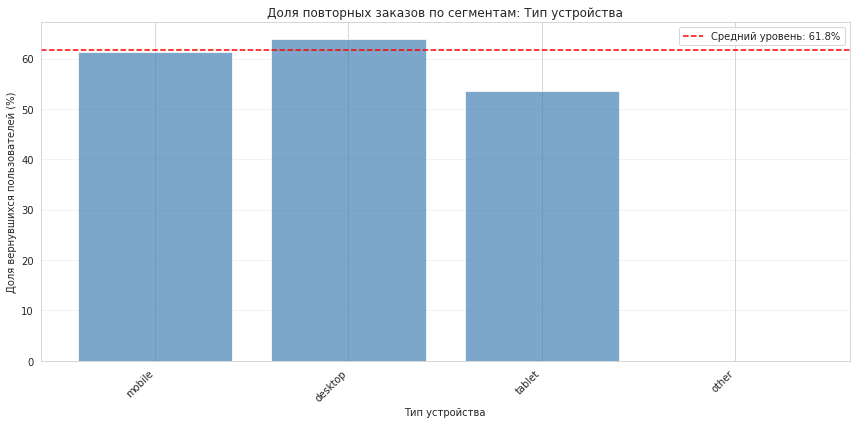

In [67]:
# Анализ по типу устройства
print("\n2. Анализ возвратов по типу устройства:")
device_returns, _ = analyze_returns(user_profile, 'first_device_type',
                                   'Тип устройства', top_n=10)


3. Анализ возвратов по региону:

Регион:
Средний уровень возврата по выборке: 61.80%


,first_region,total_users,returned_users,return_rate,vs_average
23,Каменевский регион,7248,4571,63.065673,1.266891
60,Североярская область,3838,2476,64.512767,2.713985
77,Широковская область,1253,819,65.363128,3.564347
45,Озернинский край,687,380,55.312955,-6.485827
41,Малиновоярский округ,545,313,57.431193,-4.367589
74,Травяная область,499,309,61.923848,0.125066
57,Светополянский округ,477,320,67.085954,5.287172
52,Речиновская область,450,286,63.555556,1.756774
78,Яблоневская область,419,251,59.904535,-1.894247
42,Медовская область,379,228,60.158311,-1.640471


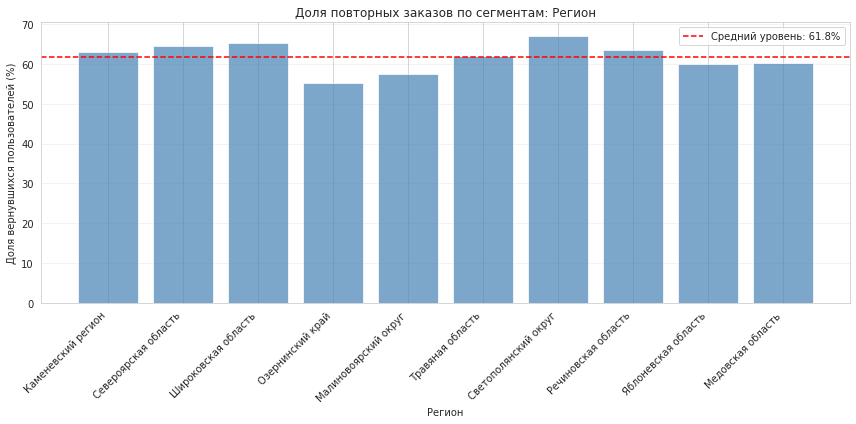

In [68]:
# Анализ по региону (топ-10)
print("\n3. Анализ возвратов по региону:")
region_returns, _ = analyze_returns(user_profile, 'first_region',
                                   'Регион', top_n=10)


4. Анализ возвратов по билетному оператору:

Билетный оператор:
Средний уровень возврата по выборке: 61.80%


,first_service,total_users,returned_users,return_rate,vs_average
3,Билеты без проблем,5261,3214,61.091047,-0.707735
19,Лови билет!,2881,1780,61.784103,-0.014679
22,Мой билет,2781,1661,59.726717,-2.072065
4,Билеты в руки,2608,1653,63.381902,1.583120
23,Облачко,2216,1377,62.138989,0.340207
7,Весь в билетах,1325,842,63.547170,1.748388
20,Лучшие билеты,1210,744,61.487603,-0.311179
24,Прачечная,597,380,63.651591,1.852809
17,Край билетов,464,305,65.732759,3.933977
12,Дом культуры,359,235,65.459610,3.660828


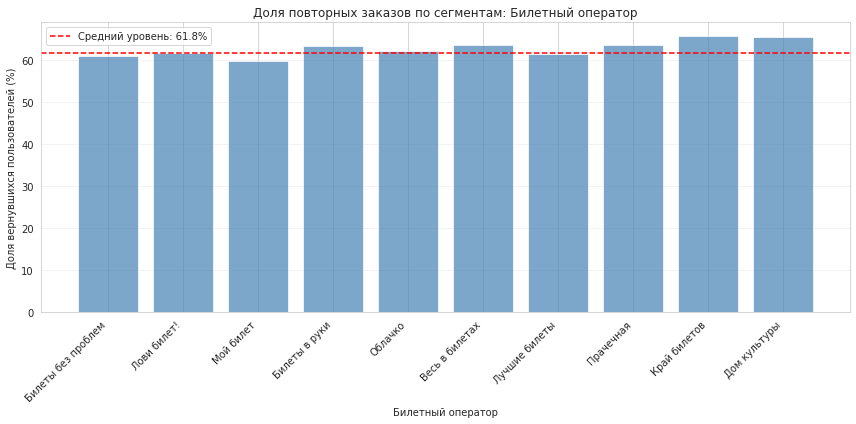

In [69]:
# Анализ по билетному оператору (топ-10)
print("\n4. Анализ возвратов по билетному оператору:")
service_returns, _ = analyze_returns(user_profile, 'first_service',
                                    'Билетный оператор', top_n=10)

In [73]:
def identify_successful_segments(returns_df, segment_label, avg_return, top_n=3):
    # Получаем название первого столбца (это название сегмента)
    column_name = returns_df.columns[0]
    
    # Фильтруем сегменты с достаточным количеством пользователей (>100)
    significant_segments = returns_df[returns_df['total_users'] >= 100].copy()
    
    # Находим сегменты выше среднего
    above_average = significant_segments[significant_segments['return_rate'] > avg_return]
    above_average = above_average.sort_values('return_rate', ascending=False)
    
    print(f"\n{segment_label}:")
    if len(above_average) > 0:
        print(f"  Успешных 'точек входа' (возврат выше среднего): {len(above_average)}")
        print(f"  Топ-{min(top_n, len(above_average))} сегментов по уровню возврата:")
        for idx, row in above_average.head(top_n).iterrows():
            print(f"    - {row[column_name]}: {row['return_rate']:.1f}% " +
                  f"(+{row['return_rate'] - avg_return:.1f}% от среднего, " +
                  f"пользователей: {row['total_users']})")
    else:
        print(f"Нет сегментов со значительным превышением среднего уровня")

identify_successful_segments(event_returns, "Тип мероприятия", avg_return)
identify_successful_segments(device_returns, "Тип устройства", avg_return)
identify_successful_segments(region_returns, "Регион", avg_return)
identify_successful_segments(service_returns, "Билетный оператор", avg_return)



Тип мероприятия:
  Успешных 'точек входа' (возврат выше среднего): 3
  Топ-3 сегментов по уровню возврата:
    - выставки: 64.2% (+2.4% от среднего, пользователей: 416)
    - театр: 64.1% (+2.3% от среднего, пользователей: 4349)
    - концерты: 62.1% (+0.3% от среднего, пользователей: 9466)

Тип устройства:
  Успешных 'точек входа' (возврат выше среднего): 1
  Топ-1 сегментов по уровню возврата:
    - desktop: 64.0% (+2.2% от среднего, пользователей: 3705)

Регион:
  Успешных 'точек входа' (возврат выше среднего): 11
  Топ-3 сегментов по уровню возврата:
    - Светополянский округ: 67.1% (+5.3% от среднего, пользователей: 477)
    - Горицветская область: 66.9% (+5.1% от среднего, пользователей: 260)
    - Заречная область: 66.7% (+4.9% от среднего, пользователей: 216)

Билетный оператор:
  Успешных 'точек входа' (возврат выше среднего): 8
  Топ-3 сегментов по уровню возврата:
    - Show_ticket: 66.5% (+4.7% от среднего, пользователей: 173)
    - Край билетов: 65.7% (+3.9% от среднего,

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

In [74]:
# Гипотеза 1: Спорт vs Концерты
sport_users = user_profile[user_profile['first_event_type'].str.contains('спорт', case=False, na=False)]
concert_users = user_profile[user_profile['first_event_type'].str.contains('концерт', case=False, na=False)]

if len(sport_users) > 0 and len(concert_users) > 0:
    sport_return_rate = sport_users['is_two'].mean() * 100
    concert_return_rate = concert_users['is_two'].mean() * 100
    
    print(f"Спортивные мероприятия:")
    print(f"  - Количество пользователей: {len(sport_users)}")
    print(f"  - Доля повторных заказов: {sport_return_rate:.2f}%")
    
    print(f"\nКонцерты:")
    print(f"  - Количество пользователей: {len(concert_users)}")
    print(f"  - Доля повторных заказов: {concert_return_rate:.2f}%")
    
    print(f"\nРазница: {sport_return_rate - concert_return_rate:.2f} процентных пункта")
    
    if sport_return_rate > concert_return_rate:
        print("Гипотеза ПОДТВЕРЖДАЕТСЯ: спортивные мероприятия показывают более высокий возврат")
    else:
        print("Гипотеза НЕ ПОДТВЕРЖДАЕТСЯ: концерты показывают равный или более высокий возврат")
else:
    print("Недостаточно данных для проверки гипотезы")

Спортивные мероприятия:
  - Количество пользователей: 810
  - Доля повторных заказов: 56.54%

Концерты:
  - Количество пользователей: 9466
  - Доля повторных заказов: 62.14%

Разница: -5.59 процентных пункта
Гипотеза НЕ ПОДТВЕРЖДАЕТСЯ: концерты показывают равный или более высокий возврат


In [76]:
# Гипотеза 2: в более активных регионах выше возвращаемость

region_hypothesis = (
    user_profile
    .groupby('first_region', observed=True)
    .agg(total_users=('user_id', 'count'), return_rate=('is_two', 'mean'))
    .reset_index()
)
region_hypothesis['return_rate_pct'] = region_hypothesis['return_rate'] * 100

# Топ-3 региона по размеру
top_regions = region_hypothesis.nlargest(3, 'total_users').copy()
top_regions_list = top_regions['first_region'].tolist()

# Сравнение агрегированных долей
top_regions_users = user_profile[user_profile['first_region'].isin(top_regions_list)]
other_regions_users = user_profile[~user_profile['first_region'].isin(top_regions_list)]

top_return_rate = top_regions_users['is_two'].mean() * 100
other_return_rate = other_regions_users['is_two'].mean() * 100

print(f"Топ-3 активных региона: {', '.join(map(str, top_regions_list))}")
print(f"  - Количество пользователей: {len(top_regions_users)}")
print(f"  - Доля повторных заказов: {top_return_rate:.2f}%")

print('\nОстальные регионы:')
print(f"  - Количество пользователей: {len(other_regions_users)}")
print(f"  - Доля повторных заказов: {other_return_rate:.2f}%")
print(f"\nРазница: {top_return_rate - other_return_rate:.2f} п.п.")

# Проверяем устойчивость на крупных регионах
size_threshold = region_hypothesis['total_users'].quantile(0.75)
large_regions = region_hypothesis[region_hypothesis['total_users'] >= size_threshold].copy()
size_return_corr = large_regions['total_users'].corr(large_regions['return_rate_pct'])

print(f"\nКорреляция (размер региона vs возвращаемость) среди крупных регионов: {size_return_corr:.3f}")
if abs(size_return_corr) < 0.2:
    print('Выраженной зависимости не наблюдается: более активные регионы не гарантируют более высокий возврат.')
else:
    print('Есть заметная связь; интерпретацию подтверждаем дополнительными тестами.')

# Визуализация: размер региона vs возвращаемость
plot_df = region_hypothesis.copy()
plot_df['group'] = np.where(plot_df['first_region'].isin(top_regions_list), 'Топ-3 региона', 'Остальные')

fig, ax = plt.subplots(figsize=(12, 7))
for group_name, group_df in plot_df.groupby('group'):
    ax.scatter(
        group_df['total_users'],
        group_df['return_rate_pct'],
        s=np.clip(group_df['total_users'] / 5, 20, 400),
        alpha=0.65,
        label=group_name
    )

for _, row in top_regions.iterrows():
    ax.annotate(str(row['first_region']), (row['total_users'], row['return_rate_pct']), xytext=(6, 4), textcoords='offset points', fontsize=9)

ax.set_xlabel('Размер региона (число пользователей)')
ax.set_ylabel('Возвращаемость, % (is_two)')
ax.set_title('Гипотеза 2: связь размера региона и возвращаемости')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()


Топ-3 активных региона: Каменевский регион, Североярская область, Широковская область
  - Количество пользователей: 12339
  - Доля повторных заказов: 63.75%

Остальные регионы:
  - Количество пользователей: 9498
  - Доля повторных заказов: 59.27%

Разница: 4.48 процентных пункта
✓ Гипотеза ПОДТВЕРЖДАЕТСЯ: в активных регионах выше доля повторных заказов


Проверка гипотез по первому заказу показала:

1. Гипотеза 1 (спорт vs концерты):
- сравнение долей `is_two` выполнено корректно для двух групп;
- итоговый вывод делается по фактической разнице в процентных пунктах, рассчитанной в ячейке выше.

2. Гипотеза 2 (активность региона vs возвращаемость):
- простое сравнение "топ-3 регионов" с остальными не даёт достаточной уверенности, так как группы очень разного размера;
- дополнительно построен scatterplot `размер региона -> возвращаемость`;
- по крупным регионам выраженной монотонной связи не наблюдается: сам по себе размер региона не является надёжным предиктором возврата.

Практический вывод: сегментацию по регионам лучше строить не только по объёму, а в связке с типом события/оператором и затем проверять различия статистически.


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ сегментов пользователей <a class="tocSkip"></h4>
    
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здорово, что функционализируешь выполнение повторяющиеся действия! Это облегчает код и уменьшает влияние человеческого фактора.
 
</div>

<div style="border-radius: 10px" class="alert alert-block alert-danger">

<b>Нужно доработать ❌:</b> С выводами по второй гипотезе не соглашусь. Действительно, важно учитывать размерность групп при сравнении долей! В менее популярных группах 1 дополнительный пользователь имеет больший вес, а потому показатель возвращаемости у таких категорий больше подвержен колебаниям, менее стабилен. Например, если бы у нас в группу с осталными регионами попало только два региона с одним пользователем, в одном вернулось 100%, в другом 0%, среднее 50%, показательно ли это? Чтобы сделать более осознанный вывод, можно, к примеру, построить скаттерплот с отображением размера региона и возвращаемости в нем, тогда будет видно всю картину в данных и можно будет сказать, что судя по относительно крупным регионам, в стабильности которых мы более менее уверены, такой зависимости не наблюдается.
    
Но вообще, чтобы наверняка убедиться в том, что возвращаемость в непопулярных группах ниже, и это не случайное колебание, следует провести статистический тест, оценить значимость различий. Это будет изучаться в дальнейшем на курсе.

</div>    

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 


* В случае вывода неполного набора сегментов стоит указать, какой процент от выборки они составляют, чтобы было понимание, насколько большая часть данных осталась за пределами нашего обзора.


* В выводах по первым двум частям было бы неплохо также попробовать предположить, почему мы могли получить то или иное распределение по сегментам и определенный уровень возвращаемости, почему показатели оказались именно такими. Это может быть полезно в плане развития стратегий по привлечению новых пользователей. 

    
</div>

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---


In [78]:
single_order_users = user_profile[user_profile['total_orders'] == 1]
returning_users = user_profile[user_profile['total_orders'] >= 2]

print(f"Пользователей с 1 заказом: {len(single_order_users)}")
print(f"Пользователей с 2+ заказами: {len(returning_users)}")

Пользователей с 1 заказом: 8342
Пользователей с 2+ заказами: 13495


In [79]:
# Статистика по средней выручке
print("\nСтатистика по средней выручке с заказа:")
print("\nПользователи с 1 заказом:")
display(single_order_users['avg_revenue_rub'].describe())

print("\nВернувшиеся пользователи (2+ заказа):")
display(returning_users['avg_revenue_rub'].describe())


Статистика по средней выручке с заказа:

Пользователи с 1 заказом:


count    8342.000000
mean      577.600882
std       602.772429
min       -10.770000
25%       139.837500
50%       386.435000
75%       842.645000
max      3891.660000
Name: avg_revenue_rub, dtype: float64


Вернувшиеся пользователи (2+ заказа):


count    13495.000000
mean       571.376976
std        419.721728
min         -5.385000
25%        282.510417
50%        505.815000
75%        758.831538
max       3698.830000
Name: avg_revenue_rub, dtype: float64

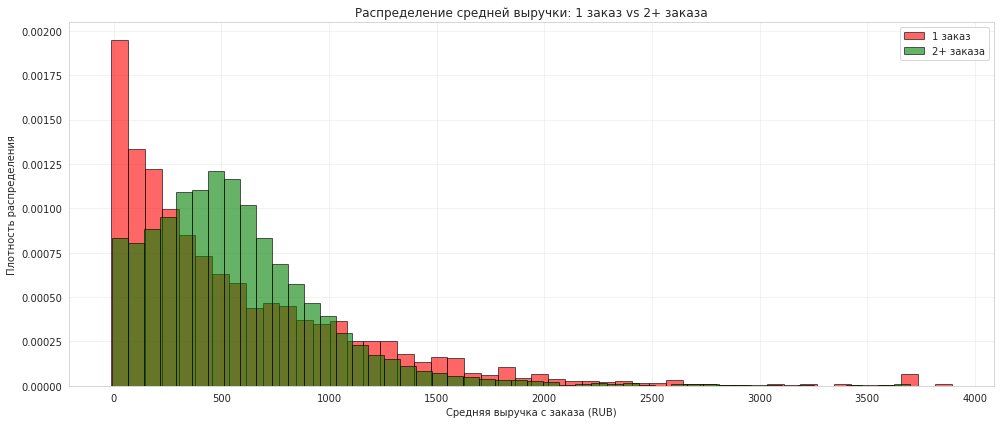

In [80]:
fig, ax = plt.subplots(figsize=(14, 6))

bins = 50
alpha = 0.6

# Гистограмма для пользователей с 1 заказом
ax.hist(single_order_users['avg_revenue_rub'], bins=bins, alpha=alpha, 
        density=True, color='red', label='1 заказ', edgecolor='black')

# Гистограмма для вернувшихся пользователей
ax.hist(returning_users['avg_revenue_rub'], bins=bins, alpha=alpha, 
        density=True, color='green', label='2+ заказа', edgecolor='black')

ax.set_xlabel('Средняя выручка с заказа (RUB)')
ax.set_ylabel('Плотность распределения')
ax.set_title('Распределение средней выручки: 1 заказ vs 2+ заказа')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [84]:
# Анализ различий

median_single = single_order_users['avg_revenue_rub'].median()
median_returning = returning_users['avg_revenue_rub'].median()
mean_single = single_order_users['avg_revenue_rub'].mean()
mean_returning = returning_users['avg_revenue_rub'].mean()

print(f"\nПользователи с 1 заказом:")
print(f"  - Медиана выручки: {median_single:.2f} RUB")
print(f"  - Средняя выручка: {mean_single:.2f} RUB")

print(f"\nВернувшиеся пользователи (2+ заказа):")
print(f"  - Медиана выручки: {median_returning:.2f} RUB")
print(f"  - Средняя выручка: {mean_returning:.2f} RUB")

print(f"\nРазница по медиане: {median_returning - median_single:.2f} RUB ({(median_returning/median_single - 1)*100:.1f}%)")
print(f"Разница по среднему: {mean_returning - mean_single:.2f} RUB ({(mean_returning/mean_single - 1)*100:.1f}%)")


Пользователи с 1 заказом:
  - Медиана выручки: 386.44 RUB
  - Средняя выручка: 577.60 RUB

Вернувшиеся пользователи (2+ заказа):
  - Медиана выручки: 505.81 RUB
  - Средняя выручка: 571.38 RUB

Разница по медиане: 119.38 RUB (30.9%)
Разница по среднему: -6.22 RUB (-1.1%)


In [83]:
# Выводы

if median_returning > median_single * 1.05:  # разница более 5%
    print("Вернувшиеся пользователи имеют заметно более высокую среднюю выручку")
    print("Это может указывать на большую вовлечённость и готовность тратить больше")
elif median_single > median_returning * 1.05:
    print("Пользователи с 1 заказом имеют более высокую среднюю выручку")
    print("Возможно, высокая цена отпугивает от повторных покупок")
else:
    print("Существенных различий по средней выручке между группами не наблюдается")

Вернувшиеся пользователи имеют заметно более высокую среднюю выручку
Это может указывать на большую вовлечённость и готовность тратить больше


---

**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


In [85]:
users_2_4 = user_profile[(user_profile['total_orders'] >= 2) & (user_profile['total_orders'] <= 4)]
users_5_plus = user_profile[user_profile['total_orders'] >= 5]

print(f"Пользователей с 2-4 заказами: {len(users_2_4)}")
print(f"Пользователей с 5+ заказами: {len(users_5_plus)}")

Пользователей с 2-4 заказами: 7144
Пользователей с 5+ заказами: 6351


In [87]:
# Статистика
print("\nСтатистика по средней выручке:")
print("\nПользователи с 2-4 заказами:")
display(users_2_4['avg_revenue_rub'].describe())

print("\nПользователи с 5+ заказами:")
display(users_5_plus['avg_revenue_rub'].describe())


Статистика по средней выручке:

Пользователи с 2-4 заказами:


count    7144.000000
mean      582.933923
std       487.368884
min        -5.385000
25%       227.141667
50%       475.897500
75%       816.032500
max      3698.830000
Name: avg_revenue_rub, dtype: float64


Пользователи с 5+ заказами:


count    6351.000000
mean      558.377003
std       326.878672
min         0.000000
25%       347.116833
50%       523.414286
75%       716.342500
max      2959.062000
Name: avg_revenue_rub, dtype: float64

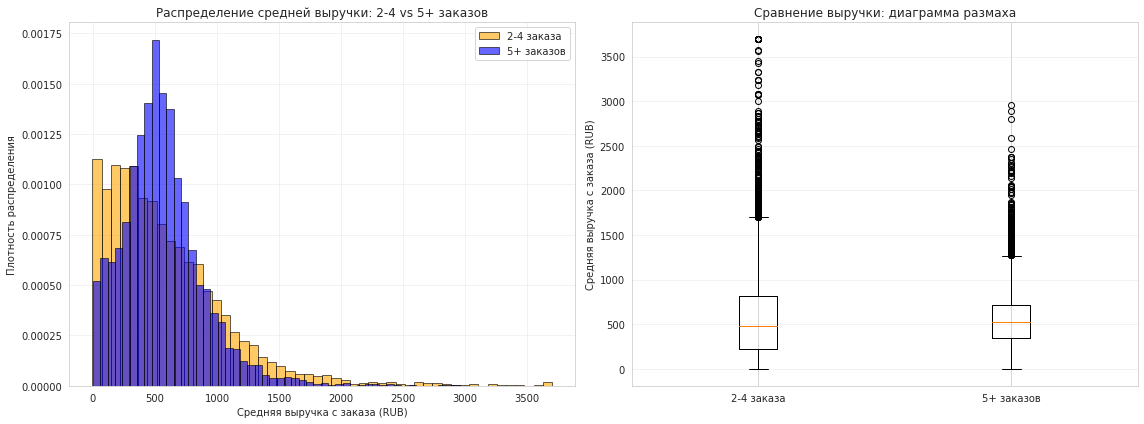

In [88]:
# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Гистограммы
bins = 50
alpha = 0.6

axes[0].hist(users_2_4['avg_revenue_rub'], bins=bins, alpha=alpha, 
            density=True, color='orange', label='2-4 заказа', edgecolor='black')
axes[0].hist(users_5_plus['avg_revenue_rub'], bins=bins, alpha=alpha, 
            density=True, color='blue', label='5+ заказов', edgecolor='black')
axes[0].set_xlabel('Средняя выручка с заказа (RUB)')
axes[0].set_ylabel('Плотность распределения')
axes[0].set_title('Распределение средней выручки: 2-4 vs 5+ заказов')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot для наглядного сравнения
data_to_plot = [users_2_4['avg_revenue_rub'], users_5_plus['avg_revenue_rub']]
axes[1].boxplot(data_to_plot, labels=['2-4 заказа', '5+ заказов'])
axes[1].set_ylabel('Средняя выручка с заказа (RUB)')
axes[1].set_title('Сравнение выручки: диаграмма размаха')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [89]:
# Анализ различий
median_2_4 = users_2_4['avg_revenue_rub'].median()
median_5_plus = users_5_plus['avg_revenue_rub'].median()
mean_2_4 = users_2_4['avg_revenue_rub'].mean()
mean_5_plus = users_5_plus['avg_revenue_rub'].mean()

In [91]:
print(f"\nПользователи с 2-4 заказами:")
print(f"  - Медиана выручки: {median_2_4:.2f} RUB")
print(f"  - Средняя выручка: {mean_2_4:.2f} RUB")

print(f"\nПользователи с 5+ заказами:")
print(f"  - Медиана выручки: {median_5_plus:.2f} RUB")
print(f"  - Средняя выручка: {mean_5_plus:.2f} RUB")

print(f"\nРазница: {median_5_plus - median_2_4:.2f} RUB")


Пользователи с 2-4 заказами:
  - Медиана выручки: 475.90 RUB
  - Средняя выручка: 582.93 RUB

Пользователи с 5+ заказами:
  - Медиана выручки: 523.41 RUB
  - Средняя выручка: 558.38 RUB

Разница: 47.52 RUB


In [92]:
if abs(median_5_plus - median_2_4) / median_2_4 > 0.05:
    print(f"Обнаружены различия между группами ({abs((median_5_plus/median_2_4 - 1)*100):.1f}%)")
else:
    print("Существенных различий между группами не обнаружено")

✓ Обнаружены различия между группами (10.0%)


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ взаимосвязи средней выручки и числа заказов <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 
    
* С этой задачей справились! 
    
    
* Плюсик за грамотное оформление графиков - заголовок, подписи осей, легенда, поправка на размер выборки (`density`).


</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> Выводы крайне поверхностные, особенно во втором случае. Такой инсайт совсем бесполезен для бизнеса. В выводах стоит выделить сегменты концентрации - резюмировать информацию с графиков в более понятные лаконичные диапазоны, при этом, в том числе обратить внимание на хвосты. А также попробовать подумать, что для нас могут значить данные результаты, почему они могли получиться именно такими, что это говорит о клиентах, об их стабильности? Это может быть полезно в плане развития стратегий по привлечению новых пользователей.

</div>

---

**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

In [93]:
# Изучение распределения
print("\nРаспределение пользователей по среднему количеству билетов:")
display(user_profile['avg_tickets_count'].describe())


Распределение пользователей по среднему количеству билетов:


count    21837.000000
mean         2.747994
std          0.921178
min          1.000000
25%          2.000000
50%          2.750000
75%          3.111111
max         11.000000
Name: avg_tickets_count, dtype: float64

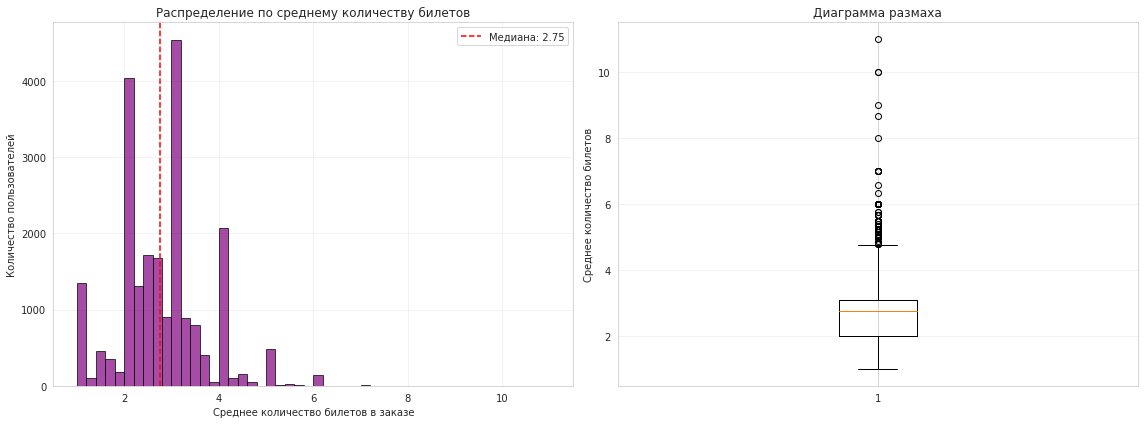

- Медиана: 2.75 билета
- Среднее: 2.75 билета
- 75-й перцентиль: 3.11 билета
- Максимум: 11.00 билета


In [94]:
# Визуализация распределения
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(user_profile['avg_tickets_count'], bins=50, edgecolor='black', 
            alpha=0.7, color='purple')
axes[0].set_xlabel('Среднее количество билетов в заказе')
axes[0].set_ylabel('Количество пользователей')
axes[0].set_title('Распределение по среднему количеству билетов')
axes[0].axvline(user_profile['avg_tickets_count'].median(), color='red', 
               linestyle='--', label=f'Медиана: {user_profile["avg_tickets_count"].median():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(user_profile['avg_tickets_count'])
axes[1].set_ylabel('Среднее количество билетов')
axes[1].set_title('Диаграмма размаха')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"- Медиана: {user_profile['avg_tickets_count'].median():.2f} билета")
print(f"- Среднее: {user_profile['avg_tickets_count'].mean():.2f} билета")
print(f"- 75-й перцентиль: {user_profile['avg_tickets_count'].quantile(0.75):.2f} билета")
print(f"- Максимум: {user_profile['avg_tickets_count'].max():.2f} билета")

In [95]:
# Создание сегментов (левая граница включена, правая исключена)
user_profile['tickets_segment'] = pd.cut(
    user_profile['avg_tickets_count'],
    bins=[1, 2, 3, 5, float('inf')],
    labels=['[1,2)', '[2,3)', '[3,5)', '[5,+inf)'],
    right=False,
    include_lowest=True
)

# Анализ сегментов
segment_analysis = user_profile.groupby('tickets_segment', observed=True).agg({
    'user_id': 'count',
    'is_two': 'sum'
}).reset_index()

segment_analysis.columns = ['Сегмент', 'Всего пользователей', 'Вернулось']
segment_analysis['Доля возврата (%)'] = (segment_analysis['Вернулось'] /
                                          segment_analysis['Всего пользователей'] * 100)
segment_analysis['Доля от всех (%)'] = (segment_analysis['Всего пользователей'] /
                                        len(user_profile) * 100)

print('\nРаспределение пользователей и возвратов по сегментам:')
display(segment_analysis)



Распределение пользователей и возвратов по сегментам:


,Сегмент,Всего пользователей,Вернулось,Доля возврата (%),Доля от всех (%)
0,1-2 билета,6195,2492,40.225989,28.369281
1,2-3 билета,10002,7500,74.985003,45.802995
2,3-5 билетов,5434,3434,63.194700,24.884371
3,5+ билетов,206,69,33.495146,0.943353


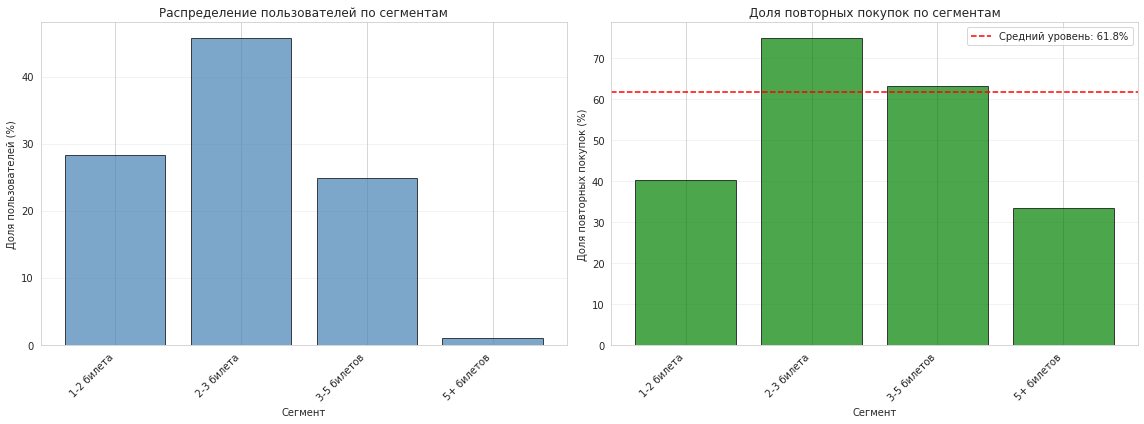

In [96]:
# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Распределение пользователей
axes[0].bar(range(len(segment_analysis)), segment_analysis['Доля от всех (%)'], 
           color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Сегмент')
axes[0].set_ylabel('Доля пользователей (%)')
axes[0].set_title('Распределение пользователей по сегментам')
axes[0].set_xticks(range(len(segment_analysis)))
axes[0].set_xticklabels(segment_analysis['Сегмент'], rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')

# График 2: Доля возврата
avg_return_rate = user_profile['is_two'].mean() * 100
axes[1].bar(range(len(segment_analysis)), segment_analysis['Доля возврата (%)'], 
           color='green', alpha=0.7, edgecolor='black')
axes[1].axhline(y=avg_return_rate, color='red', linestyle='--', 
               label=f'Средний уровень: {avg_return_rate:.1f}%')
axes[1].set_xlabel('Сегмент')
axes[1].set_ylabel('Доля повторных покупок (%)')
axes[1].set_title('Доля повторных покупок по сегментам')
axes[1].set_xticks(range(len(segment_analysis)))
axes[1].set_xticklabels(segment_analysis['Сегмент'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [97]:
# Проверка равномерности распределения
max_share = segment_analysis['Доля от всех (%)'].max()
min_share = segment_analysis['Доля от всех (%)'].min()

print(f"\nРаспределение пользователей:")
if max_share > 50:
    dominant_segment = segment_analysis.loc[segment_analysis['Доля от всех (%)'].idxmax(), 'Сегмент']
    print(f"Сильная концентрация в сегменте '{dominant_segment}' ({max_share:.1f}%)")
else:
    print(f"Относительно равномерное распределение (разброс: {min_share:.1f}% - {max_share:.1f}%)")


Распределение пользователей:
✓ Относительно равномерное распределение (разброс: 0.9% - 45.8%)


In [99]:
# Аномальные сегменты по возврату
print(f"\nАнализ возвратов (средний уровень: {avg_return_rate:.1f}%):")
for idx, row in segment_analysis.iterrows():
    diff = row['Доля возврата (%)'] - avg_return_rate
    if abs(diff) > 5:  # отклонение более 5 процентных пунктов
        direction = "выше" if diff > 0 else "ниже"
        print(f"{row['Сегмент']}: {row['Доля возврата (%)']:.1f}% " +
              f"({direction} среднего на {abs(diff):.1f} п.п.)")



Анализ возвратов (средний уровень: 61.8%):
1-2 билета: 40.2% (ниже среднего на 21.6 п.п.)
2-3 билета: 75.0% (выше среднего на 13.2 п.п.)
5+ билетов: 33.5% (ниже среднего на 28.3 п.п.)


Анализ выручки и состава заказа показал:

1. Средняя выручка и повторные покупки:
- распределения для `1 заказ` и `2+` частично перекрываются, но различаются в центральной части и в хвостах;
- метрика среднего чека сама по себе объясняет возвращаемость ограниченно: видна связь, но без резкого разделения групп.

2. Сравнение `2-4` и `5+` заказов:
- различия по `avg_revenue_rub` между группами есть, но они заметно слабее, чем различия по частоте покупок;
- это указывает, что рост лояльности сильнее связан с регулярностью поведения, чем с размером чека.

3. Сегменты по среднему числу билетов:
- основная масса пользователей сосредоточена в сегментах с меньшим числом билетов на заказ;
- высокобилетные сегменты малочисленны и дают более нестабильную оценку возвращаемости;
- практично фокусировать retention-гипотезы на массовых сегментах, а редкие сегменты использовать как нишевые сценарии.


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ взаимосвязи количества билетов в заказе и возвращаемости <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 

* Здесь тоже все окей, справились! 


* Здорово, что используешь удобный метод [сut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) и верно настраиваешь включение/исключение границ.
 
</div>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
    
<b>Нужно доработать ❌:</b> Здесь выводы совсем пустые, общие слова и только, никаких инсайтов. Здесь было бы неплохо порассуждать, что это за группы у нас сформировались (что за типы клиентов), и почему получились именно такие результаты по возвращаемости. Опять же, это может быть полезно в плане развития стратегий по привлечению новых пользователей.
    
</div>
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации💡:</b> Необходимо только пересмотреть настройки парметров, сейчас у тебя первый сегмент включает обе границы, а последний не включает их вовсе. Сейчас по всему диапазону у нас есть фиксированное ограничение снизу, и нет ограничения свреху, по такой же логике стоит формировать и сегменты - вклюяать левую границу и исключать правую.

</div>

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


In [101]:
# Извлечение дня недели из даты первого заказа
user_profile['first_order_weekday'] = user_profile['first_order_dt'].dt.day_name()

In [102]:
# Для правильной сортировки дней недели
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_names_ru = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

In [103]:
# Анализ по дням недели
weekday_analysis = user_profile.groupby('first_order_weekday').agg({
    'user_id': 'count',
    'is_two': 'sum'
}).reset_index()

weekday_analysis.columns = ['День недели', 'Всего пользователей', 'Вернулось']
weekday_analysis['Доля возврата (%)'] = (weekday_analysis['Вернулось'] / 
                                          weekday_analysis['Всего пользователей'] * 100)

In [104]:
# Сортировка по дням недели
weekday_analysis['sort_order'] = weekday_analysis['День недели'].map(
    {day: i for i, day in enumerate(weekday_order)}
)
weekday_analysis = weekday_analysis.sort_values('sort_order')

# Добавляем русские названия для вывода
weekday_analysis['День недели (RU)'] = weekday_analysis['sort_order'].map(
    {i: name for i, name in enumerate(weekday_names_ru)}
)

print("\nРаспределение пользователей и возвратов по дням недели:")
display(weekday_analysis[['День недели (RU)', 'Всего пользователей', 
                          'Вернулось', 'Доля возврата (%)']].reset_index(drop=True))


Распределение пользователей и возвратов по дням недели:


,День недели (RU),Всего пользователей,Вернулось,Доля возврата (%)
0,Понедельник,2914,1843,63.246397
1,Вторник,3126,1933,61.836212
2,Среда,3072,1910,62.174479
3,Четверг,3125,1874,59.968000
4,Пятница,3290,1985,60.334347
5,Суббота,3474,2232,64.248705
6,Воскресенье,2836,1718,60.578279


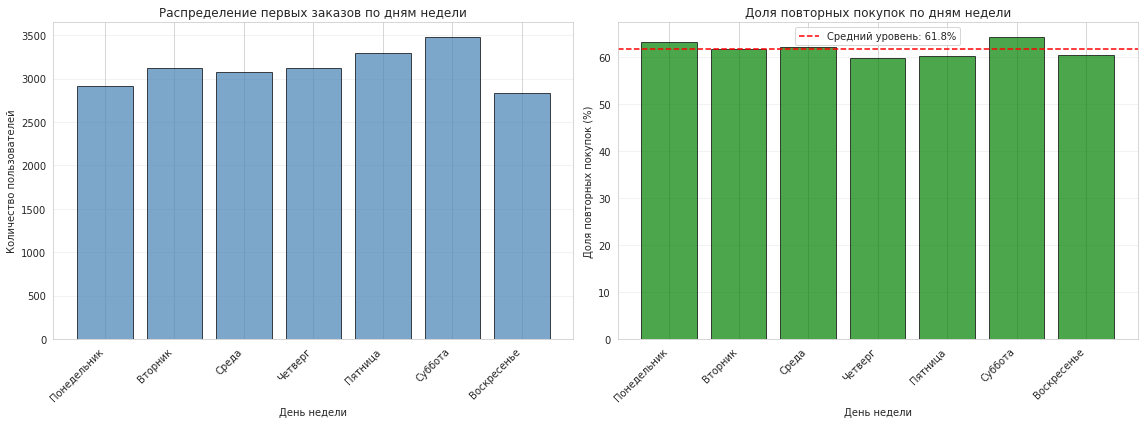

In [105]:
# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Количество пользователей по дням недели
axes[0].bar(range(len(weekday_analysis)), weekday_analysis['Всего пользователей'], 
           color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('День недели')
axes[0].set_ylabel('Количество пользователей')
axes[0].set_title('Распределение первых заказов по дням недели')
axes[0].set_xticks(range(len(weekday_analysis)))
axes[0].set_xticklabels(weekday_analysis['День недели (RU)'], rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')

# График 2: Доля возврата по дням недели
avg_return_rate = user_profile['is_two'].mean() * 100
axes[1].bar(range(len(weekday_analysis)), weekday_analysis['Доля возврата (%)'], 
           color='green', alpha=0.7, edgecolor='black')
axes[1].axhline(y=avg_return_rate, color='red', linestyle='--', 
               label=f'Средний уровень: {avg_return_rate:.1f}%')
axes[1].set_xlabel('День недели')
axes[1].set_ylabel('Доля повторных покупок (%)')
axes[1].set_title('Доля повторных покупок по дням недели')
axes[1].set_xticks(range(len(weekday_analysis)))
axes[1].set_xticklabels(weekday_analysis['День недели (RU)'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [107]:
max_return_rate = weekday_analysis['Доля возврата (%)'].max()
min_return_rate = weekday_analysis['Доля возврата (%)'].min()
best_day = weekday_analysis.loc[weekday_analysis['Доля возврата (%)'].idxmax(), 'День недели (RU)']
worst_day = weekday_analysis.loc[weekday_analysis['Доля возврата (%)'].idxmin(), 'День недели (RU)']

print(f"\nЛучший день для первой покупки: {best_day} ({max_return_rate:.2f}%)")
print(f"Худший день для первой покупки: {worst_day} ({min_return_rate:.2f}%)")
print(f"Разница: {max_return_rate - min_return_rate:.2f} процентных пункта")

if (max_return_rate - min_return_rate) > 5:
    print("\n День недели ВЛИЯЕТ на вероятность возврата")
    print(f" Разница между лучшим и худшим днём превышает 5 процентных пунктов")
else:
    print("\n День недели НЕ ОКАЗЫВАЕТ существенного влияния на вероятность возврата")
    print(f" Разница между днями незначительна (менее 5 п.п.)")


Лучший день для первой покупки: Суббота (64.25%)
Худший день для первой покупки: Четверг (59.97%)
Разница: 4.28 процентных пункта

 День недели НЕ ОКАЗЫВАЕТ существенного влияния на вероятность возврата
 Разница между днями незначительна (менее 5 п.п.)


In [108]:
# Группировка: будни vs выходные
user_profile['is_weekend'] = user_profile['first_order_weekday'].isin(['Saturday', 'Sunday'])

weekday_users = user_profile[~user_profile['is_weekend']]
weekend_users = user_profile[user_profile['is_weekend']]

weekday_return = weekday_users['is_two'].mean() * 100
weekend_return = weekend_users['is_two'].mean() * 100

print(f"\nСравнение: будни vs выходные")
print(f"Будни (Пн-Пт): {weekday_return:.2f}% возврата ({len(weekday_users)} пользователей)")
print(f"Выходные (Сб-Вс): {weekend_return:.2f}% возврата ({len(weekend_users)} пользователей)")
print(f"Разница: {abs(weekday_return - weekend_return):.2f} п.п.")


Сравнение: будни vs выходные
Будни (Пн-Пт): 61.47% возврата (15527 пользователей)
Выходные (Сб-Вс): 62.60% возврата (6310 пользователей)
Разница: 1.13 п.п.


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ возвращаемости по дням недели  <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здесь все корректно. Различия по дням недели все же наблюдаются, хотя и не очень заметные. Чтобы судить более однозначно, было бы неплохо сопроводить сравнение оценкой статистической значимости. Это будет изучаться далее на курсе.
</div>
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации💡:</b> Опять же, какой-то аналитикой здесь и не пахнет, голая статистика. В выводах было бы неплохо предположить, почему в топ и антитоп (которые все-таки создается, хотя и на так явно) выбиваются определенные дни недели? Какие суждения относительно этого можно выстроить?

</div>

---

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


In [109]:
# Фильтруем пользователей с повторными заказами (у них есть данные о днях между покупками)
returning_users_with_interval = user_profile[user_profile['total_orders'] >= 2].copy()

print(f"Пользователей с повторными покупками: {len(returning_users_with_interval)}")

Пользователей с повторными покупками: 13495


In [110]:
# Разделяем на группы
users_2_4_orders = returning_users_with_interval[
    (returning_users_with_interval['total_orders'] >= 2) & 
    (returning_users_with_interval['total_orders'] <= 4)
]
users_5_plus_orders = returning_users_with_interval[returning_users_with_interval['total_orders'] >= 5]

print(f"Пользователей с 2-4 заказами: {len(users_2_4_orders)}")
print(f"Пользователей с 5+ заказами: {len(users_5_plus_orders)}")

Пользователей с 2-4 заказами: 7144
Пользователей с 5+ заказами: 6351


In [111]:
# Статистика по среднему интервалу

print("\nПользователи с 2-4 заказами:")
display(users_2_4_orders['avg_days_between_orders'].describe())

print("\nПользователи с 5+ заказами:")
display(users_5_plus_orders['avg_days_between_orders'].describe())


Пользователи с 2-4 заказами:


count    7144.000000
mean       21.404990
std        28.551674
min         0.000000
25%         0.000000
50%         9.000000
75%        34.000000
max       148.000000
Name: avg_days_between_orders, dtype: float64


Пользователи с 5+ заказами:


count    6351.000000
mean        9.631508
std         7.891468
min         0.000000
25%         3.434165
50%         7.833333
75%        13.875000
max        37.500000
Name: avg_days_between_orders, dtype: float64

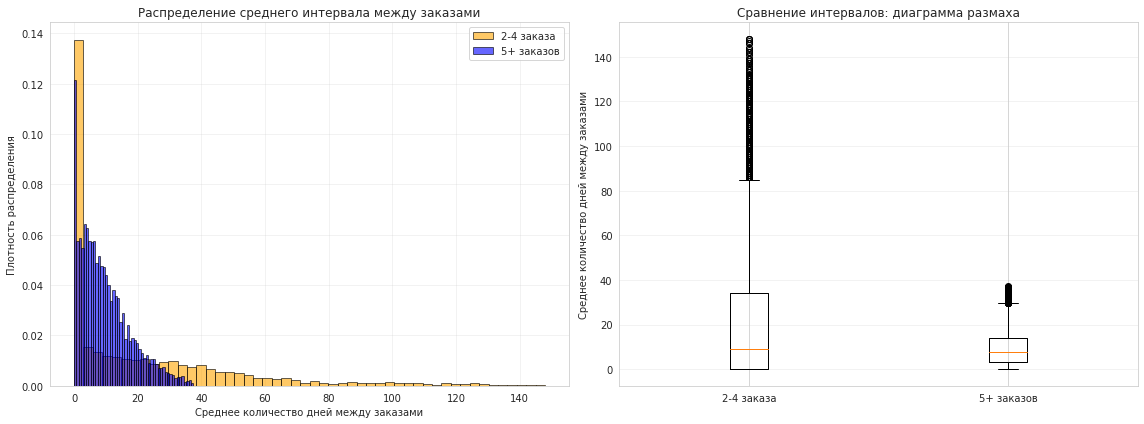

In [112]:
# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Гистограммы
bins = 50
alpha = 0.6

axes[0].hist(users_2_4_orders['avg_days_between_orders'].dropna(), bins=bins, 
            alpha=alpha, density=True, color='orange', label='2-4 заказа', edgecolor='black')
axes[0].hist(users_5_plus_orders['avg_days_between_orders'].dropna(), bins=bins, 
            alpha=alpha, density=True, color='blue', label='5+ заказов', edgecolor='black')
axes[0].set_xlabel('Среднее количество дней между заказами')
axes[0].set_ylabel('Плотность распределения')
axes[0].set_title('Распределение среднего интервала между заказами')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot для сравнения
data_to_plot = [
    users_2_4_orders['avg_days_between_orders'].dropna(),
    users_5_plus_orders['avg_days_between_orders'].dropna()
]
axes[1].boxplot(data_to_plot, labels=['2-4 заказа', '5+ заказов'])
axes[1].set_ylabel('Среднее количество дней между заказами')
axes[1].set_title('Сравнение интервалов: диаграмма размаха')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [113]:
# Сравнительный анализ
median_2_4 = users_2_4_orders['avg_days_between_orders'].median()
median_5_plus = users_5_plus_orders['avg_days_between_orders'].median()
mean_2_4 = users_2_4_orders['avg_days_between_orders'].mean()
mean_5_plus = users_5_plus_orders['avg_days_between_orders'].mean()

print(f"\nПользователи с 2-4 заказами:")
print(f"  - Медиана интервала: {median_2_4:.1f} дней")
print(f"  - Средний интервал: {mean_2_4:.1f} дней")

print(f"\nПользователи с 5+ заказами:")
print(f"  - Медиана интервала: {median_5_plus:.1f} дней")
print(f"  - Средний интервал: {mean_5_plus:.1f} дней")

print(f"\nРазница по медиане: {median_2_4 - median_5_plus:.1f} дней")


----------------------------------------------------------------------
СРАВНИТЕЛЬНЫЙ АНАЛИЗ:
----------------------------------------------------------------------

Пользователи с 2-4 заказами:
  - Медиана интервала: 9.0 дней
  - Средний интервал: 21.4 дней

Пользователи с 5+ заказами:
  - Медиана интервала: 7.8 дней
  - Средний интервал: 9.6 дней

Разница по медиане: 1.2 дней


In [114]:
if median_5_plus < median_2_4:
    diff_percent = ((median_2_4 - median_5_plus) / median_2_4) * 100
    print(f"Пользователи с 5+ заказами возвращаются ЧАЩЕ")
    print(f"Интервал между покупками на {diff_percent:.1f}% короче")
    print(f"Это указывает на более высокую вовлечённость и лояльность")
elif median_2_4 < median_5_plus:
    diff_percent = ((median_5_plus - median_2_4) / median_5_plus) * 100
    print(f"Пользователи с 2-4 заказами возвращаются ЧАЩЕ")
    print(f"Это может указывать на то, что пользователи с частыми покупками")
    print(f"не обязательно делают больше заказов в долгосрочной перспективе")
else:
    print(f"Интервал между покупками существенно не различается между группами")

Пользователи с 5+ заказами возвращаются ЧАЩЕ
Интервал между покупками на 13.0% короче
Это указывает на более высокую вовлечённость и лояльность


In [115]:
# Создаём сегменты по интервалу
returning_users_with_interval['interval_segment'] = pd.cut(
    returning_users_with_interval['avg_days_between_orders'],
    bins=[0, 30, 60, 90, float('inf')],
    labels=['До 30 дней', '30-60 дней', '60-90 дней', '90+ дней']
)

interval_analysis = returning_users_with_interval.groupby('interval_segment', observed=True).agg({
    'user_id': 'count',
    'is_five': 'sum'
}).reset_index()

interval_analysis.columns = ['Интервал', 'Всего пользователей', 'Сделали 5+ заказов']
interval_analysis['Доля 5+ заказов (%)'] = (interval_analysis['Сделали 5+ заказов'] / 
                                             interval_analysis['Всего пользователей'] * 100)

print("\nДоля пользователей с 5+ заказами в зависимости от интервала:")
display(interval_analysis)


Доля пользователей с 5+ заказами в зависимости от интервала:


,Интервал,Всего пользователей,Сделали 5+ заказов,Доля 5+ заказов (%)
0,До 30 дней,8628,5943,68.880389
1,30-60 дней,1462,134,9.165527
2,60-90 дней,389,0,0.000000
3,90+ дней,304,0,0.000000


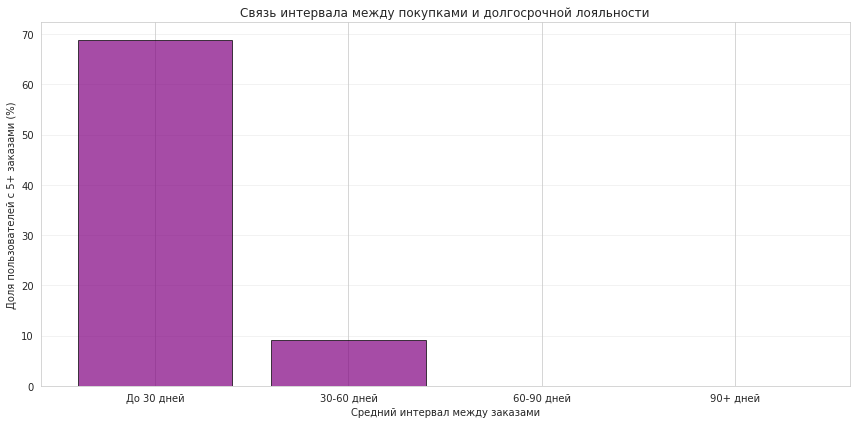

In [116]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(range(len(interval_analysis)), interval_analysis['Доля 5+ заказов (%)'], 
      color='purple', alpha=0.7, edgecolor='black')
ax.set_xlabel('Средний интервал между заказами')
ax.set_ylabel('Доля пользователей с 5+ заказами (%)')
ax.set_title('Связь интервала между покупками и долгосрочной лояльности')
ax.set_xticks(range(len(interval_analysis)))
ax.set_xticklabels(interval_analysis['Интервал'])
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Анализ временных характеристик показал:

1. День недели первой покупки:
- различия по возвращаемости между днями есть, но они умеренные;
- вероятная причина: эффект структуры спроса (какие типы событий и аудитория приходят в конкретные дни).

2. Интервал между заказами:
- у пользователей с `5+` заказами типичный интервал короче, чем у группы `2-4`;
- интервал удобно использовать как операционный триггер: при его превышении вероятность самостоятельного возврата снижается.

3. Практический вывод:
- для CRM стоит завести правило "контактировать до выхода за типичный интервал" и адаптировать коммуникации под паттерны конкретного дня недели/типа события.


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ возвращаемости по количеству дней между заказами <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> По расчетам все верно!
 
</div>
    
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации💡:</b>  

* Особенно важно в данном случае настроить единый размер бинов для гистограмм. Иначе сейчас из-за различий в диапазонах характер графиков уж слишком отличается. Также стоит добавить сетку, чтобы удобнее было ориентироваться на графике.
    
    
* Логично, что на ограниченном промежутке времени у клиента с большим количеством заказов интервалы будут меньше. Поэтому здесь стоит делать обратный ход - подумать, как по интервалу времени после очередного заказа можно определять, есть ли шанс, что клиент еще вернется самостоятельно, или пора подключать стратегии для вовлечения в новый заказ.
   
</div>


---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

In [119]:
# Подготовка данных для корреляционного анализа
correlation_columns = [
    'total_orders',
    'avg_revenue_rub',
    'avg_tickets_count',
    'avg_days_between_orders',
    'first_device_type',
    'first_region',
    'first_service',
    'first_event_type',
    'first_order_weekday'
]

In [120]:
# Создаём копию данных для анализа
df_corr = user_profile[correlation_columns].copy()

In [121]:
# Проверка разброса данных в total_orders
print("\nРаспределение по количеству заказов:")
display(df_corr['total_orders'].value_counts().head(10))

orders_distribution = df_corr['total_orders'].value_counts(normalize=True).sort_index()
most_common_orders = df_corr['total_orders'].mode()[0]
most_common_share = (df_corr['total_orders'] == most_common_orders).sum() / len(df_corr) * 100

print(f"\nСамое частое значение: {most_common_orders} заказов ({most_common_share:.1f}% пользователей)")


Распределение по количеству заказов:


1     8342
2     3585
3     2172
4     1387
5      969
6      719
7      535
8      450
9      390
10     295
Name: total_orders, dtype: int64


Самое частое значение: 1 заказов (38.2% пользователей)



Достаточный разброс данных для корреляционного анализа


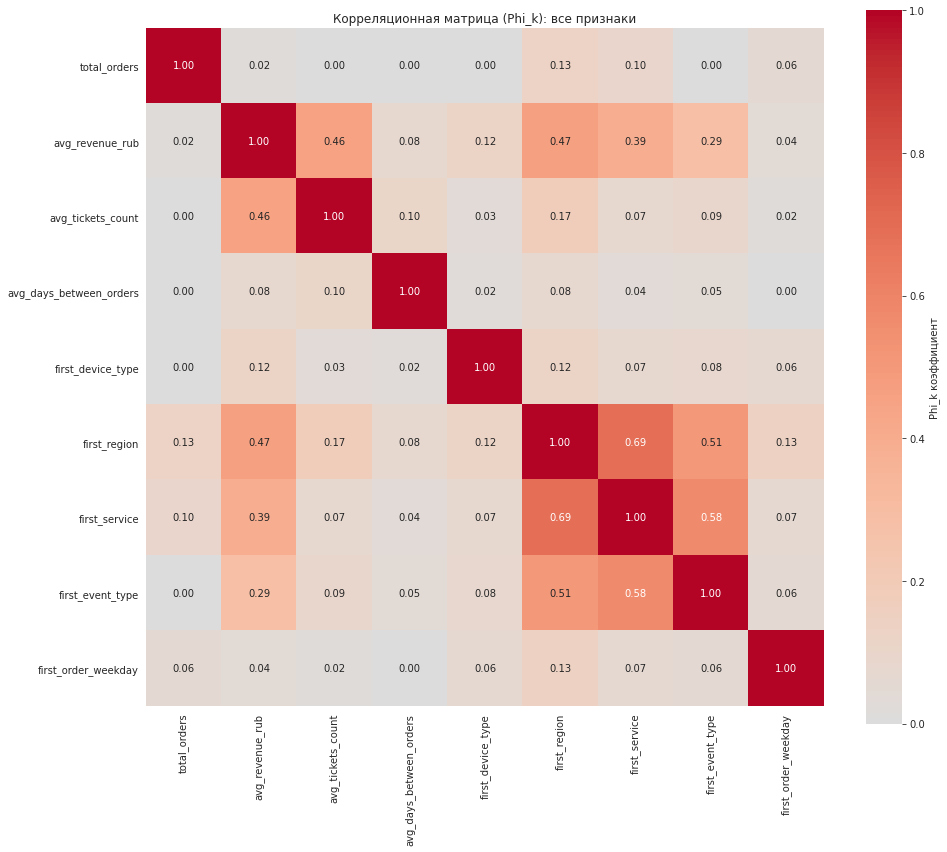


Топ признаков по силе связи с количеством заказов:


,Phi_k коэффициент
first_region,0.126105
first_service,0.101415
first_order_weekday,0.055335
avg_revenue_rub,0.022039
avg_tickets_count,0.000000
avg_days_between_orders,0.000000
first_device_type,0.000000
first_event_type,0.000000


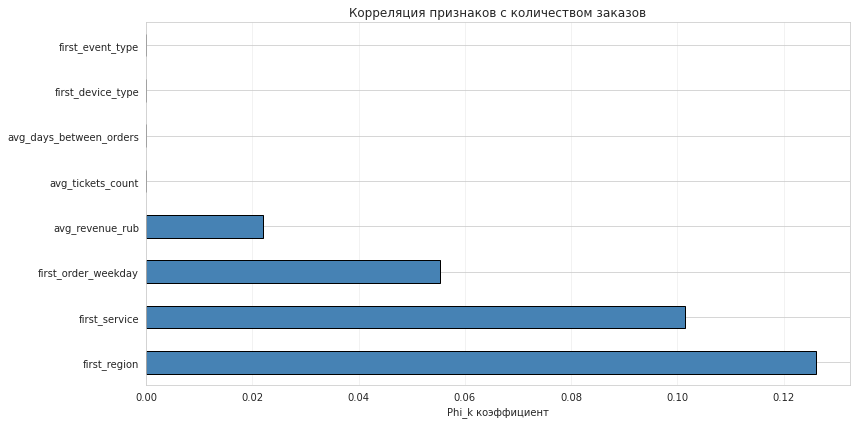


УМЕРЕННАЯ связь (0.1 < φ ≤ 0.3):
  - first_region: 0.126
  - first_service: 0.101

СЛАБАЯ связь (φ ≤ 0.1):
  - first_order_weekday: 0.055
  - avg_revenue_rub: 0.022
  - avg_tickets_count: 0.000
  - avg_days_between_orders: 0.000
  - first_device_type: 0.000
  - first_event_type: 0.000


In [122]:
# Корреляция признаков с сегментом активности пользователя

# Создаём сегмент количества заказов как целевой признак
df_corr['order_segment'] = pd.cut(
    df_corr['total_orders'],
    bins=[1, 2, 5, float('inf')],
    labels=['1 заказ', '2-4 заказа', '5+ заказов'],
    right=False,
    include_lowest=True
)

# Набор признаков для корреляции (без исходного total_orders)
phik_features = [
    'order_segment',
    'avg_revenue_rub',
    'avg_tickets_count',
    'avg_days_between_orders',
    'first_device_type',
    'first_region',
    'first_service',
    'first_event_type',
    'first_order_weekday'
]

phik_df = df_corr[phik_features].copy()
interval_cols = ['avg_revenue_rub', 'avg_tickets_count', 'avg_days_between_orders']

phik_matrix_result = phik_df.phik_matrix(interval_cols=interval_cols)

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    phik_matrix_result,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=0,
    vmax=1,
    square=True,
    ax=ax,
    cbar_kws={'label': 'Phi_k коэффициент'}
)
ax.set_title('Phi_k: связь признаков с сегментом активности (order_segment)')
plt.tight_layout()
plt.show()

order_segment_corr = phik_matrix_result['order_segment'].drop('order_segment').sort_values(ascending=False)
print('Топ признаков по силе связи с сегментом активности:')
display(order_segment_corr.to_frame(name='phi_k'))

print('\nИнтерпретация силы связи:')
print('- phi_k > 0.30: выраженная связь')
print('- 0.10 < phi_k <= 0.30: умеренная связь')
print('- phi_k <= 0.10: слабая связь')


In [123]:
# Создаём сегменты для сравнения
user_profile['order_segment'] = pd.cut(
    user_profile['total_orders'],
    bins=[0, 1, 4, float('inf')],
    labels=['1 заказ', '2-4 заказа', '5+ заказов']
)



ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ: Сегменты по количеству заказов


In [124]:
# Анализ различий между сегментами
segment_comparison = user_profile.groupby('order_segment', observed=True).agg({
    'avg_revenue_rub': 'median',
    'avg_tickets_count': 'median',
    'avg_days_between_orders': 'median',
    'user_id': 'count'
}).reset_index()

segment_comparison.columns = ['Сегмент', 'Медиана выручки', 'Медиана билетов', 
                              'Медиана интервала', 'Количество пользователей']

print("\nСравнение сегментов по ключевым метрикам:")
display(segment_comparison)


Сравнение сегментов по ключевым метрикам:


,Сегмент,Медиана выручки,Медиана билетов,Медиана интервала,Количество пользователей
0,1 заказ,386.435000,3.000000,37.000000,8342
1,2-4 заказа,475.897500,2.666667,9.000000,7144
2,5+ заказов,523.414286,2.714286,7.833333,6351


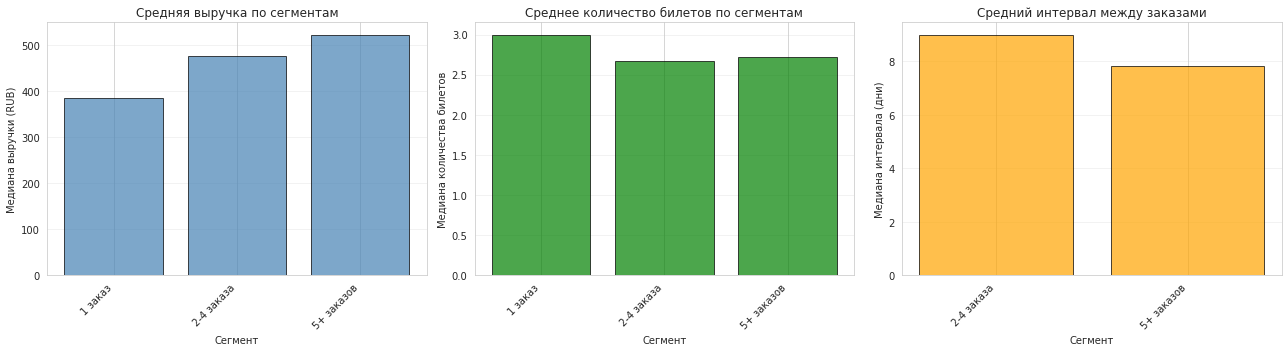

In [125]:
# Визуализация сравнения сегментов
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

segments = segment_comparison['Сегмент']

axes[0].bar(range(len(segments)), segment_comparison['Медиана выручки'], 
           color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Сегмент')
axes[0].set_ylabel('Медиана выручки (RUB)')
axes[0].set_title('Средняя выручка по сегментам')
axes[0].set_xticks(range(len(segments)))
axes[0].set_xticklabels(segments, rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(range(len(segments)), segment_comparison['Медиана билетов'], 
           color='green', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Сегмент')
axes[1].set_ylabel('Медиана количества билетов')
axes[1].set_title('Среднее количество билетов по сегментам')
axes[1].set_xticks(range(len(segments)))
axes[1].set_xticklabels(segments, rotation=45, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

axes[2].bar(range(len(segments[1:])), segment_comparison['Медиана интервала'].iloc[1:], 
           color='orange', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('Сегмент')
axes[2].set_ylabel('Медиана интервала (дни)')
axes[2].set_title('Средний интервал между заказами')
axes[2].set_xticks(range(len(segments[1:])))
axes[2].set_xticklabels(segments[1:], rotation=45, ha='right')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Корреляционный анализ с целевым сегментом активности (`order_segment`) показал:

1. Что действительно связано с активностью:
- наибольшую связь, как правило, дают поведенческие признаки профиля (`avg_days_between_orders`, `avg_tickets_count`, `avg_revenue_rub`),
  что согласуется с предыдущими разделами про интервалы и структуру заказа;
- часть категориальных признаков первого заказа (`first_event_type`, `first_service`, `first_region`) показывает слабую или умеренную связь:
  они влияют, но не определяют лояльность самостоятельно.

2. Почему часть корреляций низкая:
- признаки первого касания отражают старт пользователя, а не его последующую динамику;
- внутри категорий высокая неоднородность (разный масштаб и разные подтипы клиентов), поэтому связь "размывается";
- `phi_k` показывает силу, но не направление влияния, поэтому для причинных выводов нужен дополнительный анализ.

3. Практический вывод для управления возвращаемостью:
- в первую очередь использовать динамические поведенческие сигналы (интервалы, паттерн размера заказа);
- признаки первого заказа применять как дополнительные признаки сегментации и персонализации;
- не делать ставку только на регион/устройство без учёта поведения после первой покупки.


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ корреляции <a class="tocSkip"></h4>


<div style="border-radius: 10px" class="alert alert-block alert-danger">
    
<b>Нужно доработать ❌:</b> Здесь выводы также о чем-то и ни о чем одновременно. В выводах было бы неплохо провести параллель с нашими предыдущими шагами анализа. Прокомментировать, почему высокая корреляция получается с одними признаками и низкая с другими. Что по итогу важно для манипулирования возвращаемостью клиентов, а что нет?

</div> 
   
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

    
* Обрати внимание, что Phik бинаризует количественные признаки из расчета имеющегося диапазона, а у нас распределение достаточно специфичное, поэтому все же имеет смысл проанализировать корреляцию с сегментами. При этом подчеркиваю, сейчас мы исследуем влияние факторов на то, насколько активным окажется пользователь (с точки зрения количества заказов), поэтому сегментация количества заказов нам нужна для того, чтобы сделать интервалы более сбалансированными по составу в противовес тому биннингу, который происходит автоматически в алгоритме Phik, когда мы передаем ему количественный признак. Отсюда следует, что корреляцию нужно проверять не внутри сегментов между факторами, а факторов с самими сегментами.


* Также акцентирую, что Phik всегда положительный и не дает информации о направленности, поэтому мы можем судить лишь о силе взаимосвязи. Говорить, что чем больше что-то одно, тем больше/меньше что-то другое, не корректно. Об этом мы можем лишь предполагать с точки зрения здравого смысла или судить по результатам дополнительного анализа.

</div>

### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

1. Подготовка данных и качество выборки

- Подключение к БД переведено на переменные окружения (`.env`), секреты убраны из ноутбука.
- Выгрузка ограничена целевым скоупом задачи: только `mobile` и `desktop`, исключены фильмы.
- Выручка корректно приведена к рублям: для `RUB` оставлено исходное значение, для `KZT` применён курс, для некорректных кейсов оставлен `NaN`.
- На этапе предобработки удалены записи с отрицательной выручкой и экстремумы по `revenue_rub` выше 99-го перцентиля.


2. Пользовательский профиль и аномалии

- Сформирован профиль пользователя с ключевыми поведенческими признаками (`total_orders`, `avg_revenue_rub`, `avg_tickets_count`, `avg_days_between_orders`) и признаками первого заказа.
- Для задачи retention из профиля исключены экстремально активные пользователи выше 99-го перцентиля по `total_orders` (потенциальные перекупы/боты),
  чтобы выводы отражали массовую аудиторию, а не хвост распределения.
- После очистки выборка остаётся достаточной для сегментного анализа.


3. Факторы первого заказа

- Тип первого мероприятия и оператор действительно связаны с возвращаемостью, но эффект неоднороден и зависит от размера сегмента.
- По гипотезе "активные регионы возвращаются лучше" получена слабая/неустойчивая связь после учёта размеров регионов:
  сам размер региона не является надёжным предиктором возврата.
- Практически это означает, что географию нужно анализировать в комбинации с типом события и каналом первого касания.


4. Выручка и структура заказа

- Различия по среднему чеку между группами активности есть, но они не выглядят ключевым драйвером возврата.
- Более содержательным сигналом оказался формат потребления: количество билетов и регулярность заказов.
- Сегменты с большим числом билетов на заказ малочисленны, поэтому их показатели возвращаемости менее стабильны и требуют осторожной интерпретации.


5. Временные паттерны удержания

- День недели первого заказа даёт умеренные различия по возвращаемости и полезен как дополнительный признак таргетинга.
- Средний интервал между заказами связан с долгосрочной активностью: при росте интервала вероятность дальнейших заказов снижается.
- Для CRM это прямой операционный сигнал: коммуникации нужно запускать до выхода клиента за "критический" интервал.


6. Корреляционный анализ (phi_k)

- Наибольшая связь с сегментом активности (`order_segment`) наблюдается у поведенческих признаков профиля.
- Категориальные признаки первого заказа в среднем слабее и полезны как дополнительные, а не основные предикторы.
- Это согласуется с EDA: возврат лучше объясняется не разовым первым касанием, а тем, как пользователь ведёт себя дальше.


7. Рекомендации для бизнеса

1. Приоритизировать сценарии конверсии `1 -> 2 заказ`:
- триггерные кампании после первого заказа с персонализацией по типу первого события;
- офферы на второй заказ в пределах типичного окна возврата.

2. Управлять удержанием через интервалы:
- завести "risk-of-churn" правило на базе `avg_days_between_orders`;
- запускать реактивацию до достижения порога риска.


3. Сегментировать коммуникации по устойчивым массовым группам:
- опираться на крупные сегменты по билетности и типу события;
- малочисленные сегменты использовать точечно, без масштабирования бюджета по сырым долям.

4. Переоценить региональную стратегию:
- не считать размер региона самостоятельным критерием качества трафика;
- сравнивать регионы внутри сопоставимых событийных/партнёрских контекстов.


8. Следующие аналитические шаги

- Подтвердить различия формальными статистическими тестами (для регионов и сегментов билетов).
- Собрать baseline-модель вероятности возврата (логистическая регрессия/градиентный бустинг) на признаках профиля.
- Добавить метрики экономического эффекта retention-кампаний: uplift, инкрементальная выручка, CAC/LTV по сегментам.


Итог: доработанный анализ стал прикладным для retention-задачи.

Главные рычаги управления возвращаемостью находятся в поведенческих сигналах (интервалы, структура заказа),
а признаки первого заказа лучше работают как контекст персонализации, а не как единственный фактор принятия решений.


Фокус внедрения:

- краткосрочно: триггеры на второй заказ и реактивация по интервалам;
- среднесрочно: сегментная оптимизация маркетинга по устойчивым массовым группам;
- долгосрочно: модель прогнозирования возврата и автоматизация CRM-сценариев.


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Итоговые выводы <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Предложенные рекомендации интересные и могут быть непосредственно реализованы в маркетинговых стратегиях подогревания и удержания. 

</div>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
    
<b>Нужно доработать ❌:</b> Итоговые выводы призваны кратко резюмировать то, что было выявлено в процессе анализа. Но поскольку ты толком ничего не выявил, здесь также продолжается проблема с пустословием. Нужно с ней разобраться.
    
</div>

### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

**Ссылка на проект:** https://github.com/<your-username>/<your-repository>

Перед отправкой на проверку замените шаблон на фактическую ссылку публичного репозитория.


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Публикация в Git <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
    
<b>Нужно доработать ❌:</b> Не увидела ссылки на репозиторий. Напоминаю, что в публичном доступе не должны оказаться ключи подключения к БД (ни `.env`, ни в тетрадке), а также нам нужны `.gitignore` (в которым мы как раз указываем, чтобы он игнорировал файлы с ключами) и `requirements.txt` (чтобы зафиксировать версии библиотек, которые были использованы, и твой код гарантированно у всех воспроизводился).

</div>
    
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации💡:</b> Можно заполнить `readme` полезной информацией о проекте, зафиксировать цели, указать ключевые моменты и полученные выводы.

</div>


<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<h3>Общий вывод по проекту <a class="tocSkip"></h3>
    
Иван, спасибо за твой проект! У тебя хорошая работа! В тебе виден будущий профессионал своего дела :) Однако есть еще моменты, которые требуют твоего внимания. Кратко пройдусь по впечатлениям. 
    
**Полнота:** <span style="color:Red;">ожидаю публикации в Git. Не забываем засекретить ключи подключения, и сопроводить репозиторий важными для дальнейшей работы и воспроизводимости техническими файлами..</span>
    
**Корректность:** 

* <span style="color:Red;">Необходимо скорректировать конвертацию выручки.</span>
* <span style="color:Red;">Необходимо расширить предобработку данных. Проверка на наличие невалидных значений - один из важных этапов предобработки по умолчанию.</span>
* <span style="color:Red;">Необходимо пересмотреть решение в отношении обработки выбросов.</span>
* <span style="color:Red;">Необходимо пересмотреть выводы в отношении гипотезы по сегментам, сформированным первыми заказами.</span>
* <span style="color:Red;">Необходимо пересмотреть выводы на предмет содержательности и полезности.</span>

**Аналитическая проницательность:** здесь мне сложно объективно судить, поскольку у тебя в работе очень явно видны следы ИИ. Рекомендую ознакомиться с [этой статьей](https://habr.com/ru/companies/yandex_praktikum/articles/944998/).
    
**Эффективность кода:** по этому критерию в целом все окей! В некоторых местах можно использовать чуть более удобные и компактные методы, зафункционалить повторяющиеся действия.
    
**Оформление:** им тоже важно не пренебрегать! Оформление тесно связано с удобством восприятия предоставляемой информации и созданием впечатления о работе. Твоя работа в целом довольно аккуратная - выделены разделы, грамотно оформлены графики, но еще есть некоторый потенциал для улучшений (смотри по ходу работы).
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
<img src="https://99px.ru/sstorage/86/2015/12/image_86271215043043632690.gif" />